In [2]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn import metrics
import math
from math import sqrt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from sklearn.model_selection import TimeSeriesSplit

from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

import os
import numpy.random as nr
import random as rn
import tensorflow as tf

np.random.seed(24)
tf.random.set_seed(24)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

os.environ['PYTHONHASHSEED']='0'
nr.seed(24)

In [3]:
def select_country(df, name, features, target):
    country = df[df['Country'] == name]
    data = country[['Year'] + features + [target]].copy()
    data['Year'] = pd.to_datetime(data['Year'], format='%Y')
    data = data.set_index('Year')
    return data

In [4]:
def split_sequence(X, y, n_in, n_out):
    X_seq, y_seq = [], []
    for i in range(len(X)):
        end_ix = i + n_in
        out_end_ix = end_ix + n_out
        if out_end_ix > len(X):
            break
        seq_x, seq_y = X[i:end_ix], y[end_ix:out_end_ix]
        X_seq.append(seq_x)
        y_seq.append(seq_y)
    return np.array(X_seq), np.array(y_seq)

In [5]:
def metric(fcast, test):
    mae = mean_absolute_error(test, fcast)
    mse = mean_squared_error(test, fcast)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(test, fcast)
    print(f'MAE : {mae}')
    print(f'MSE : {mse}')
    print(f'RMSE : {rmse}')
    print(f'MAPE : {mape}')

In [6]:
def build_and_train_model(X_train, y_train, n_in, n_features, n_out, epochs=200, learning_rate=0.001, batch_size=32):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_in, n_features)),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(60, activation='relu'),
        tf.keras.layers.Dense(n_out)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    return model


In [7]:
emissions_log = pd.read_excel(r"C:\Users\DELL PC\Downloads\GHGlogtransformated.xlsx")

features = ['Energy']  
target = 'Total GHG emissions without LULUCF'


In [8]:
start_year = 2022
num_steps = 9
n_in, n_out = 4, 9
epochs = 1000
learning_rate = 0.0001


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Metrics for Australia (Fold 1):
MAE : 0.061925198489225806
MSE : 0.004383865744188081
RMSE : 0.06621076758494861
MAPE : 0.009844050231844032
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Metrics for Australia (Fold 2):
MAE : 0.18125207358426762
MSE : 0.033011039889091924
RMSE : 0.1816894049995539
MAPE : 0.028814818257115238
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Metrics for Australia (Fold 3):
MAE : 0.1363904676089541
MSE : 0.0189563289437463
RMSE : 0.13768198481917052
MAPE : 0.0217343413764656
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Metrics for Australia (Fold 4):
MAE : 0.047073775647088034
MSE : 0.0022646456788377495
RMSE : 0.047588293506257914
MAPE : 0.007463175128091121
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Metrics for Australia (Fold 5):
MAE : 0.1327862671468075
MSE : 0.017919646707129727
RMSE : 0.13386428465849182
MAPE : 0.02115062367744569
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
            CNN Forecast
2022-12-31      6.462375
2023-12-31      6.4007

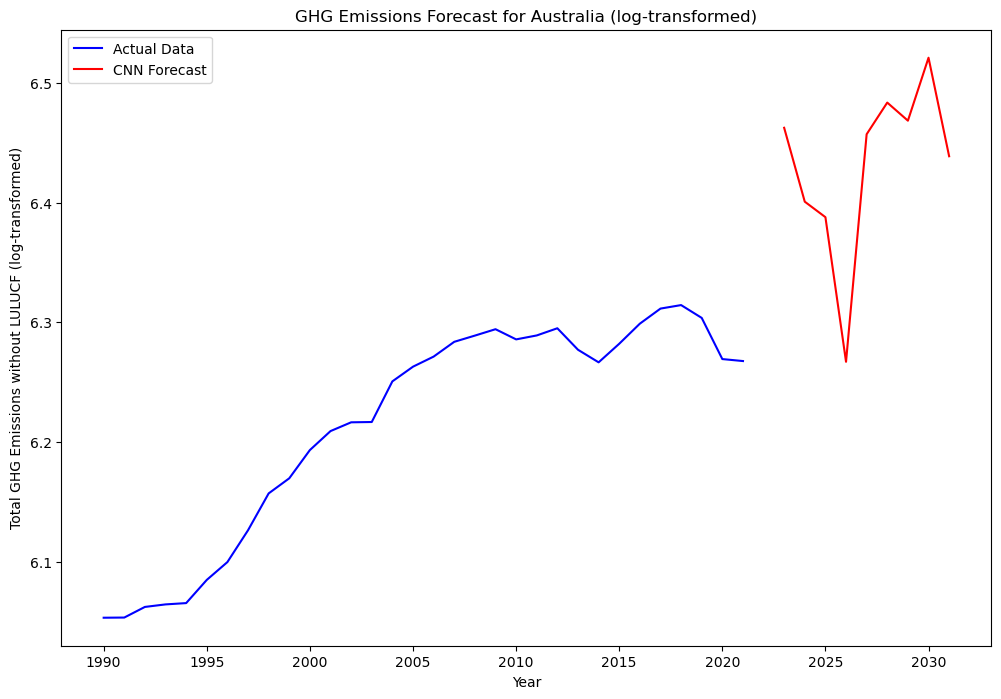

            CNN Forecast
2022-12-31    640.580750
2023-12-31    602.273376
2024-12-31    594.537048
2025-12-31    526.951965
2026-12-31    637.128967
2027-12-31    654.189148
2028-12-31    644.385437
2029-12-31    679.140320
2030-12-31    625.539124


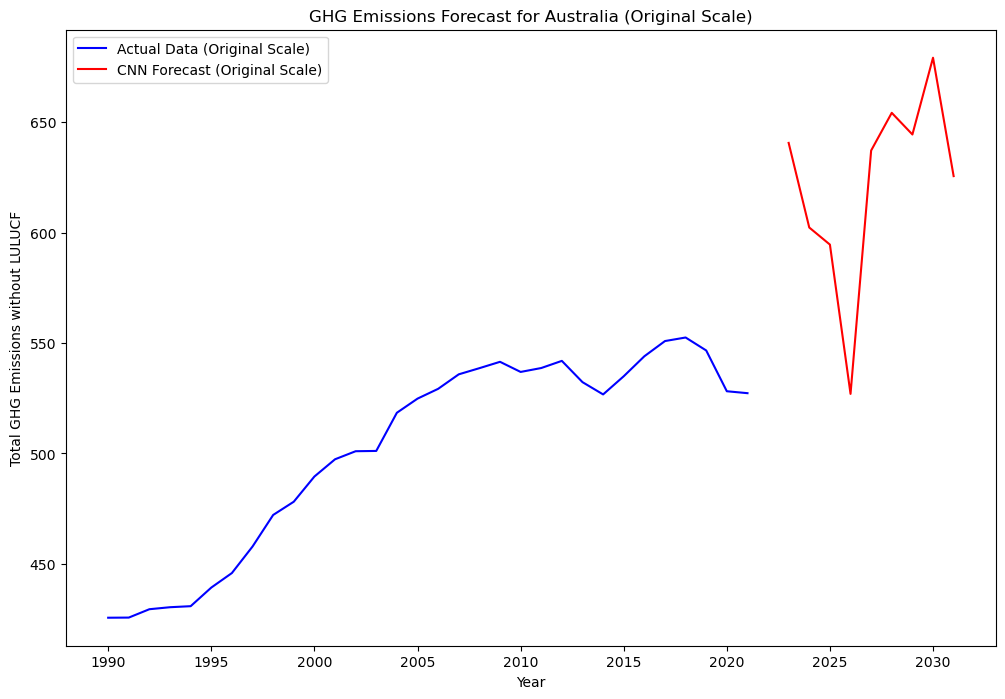

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Metrics for Austria (Fold 1):
MAE : 0.12466407941636663
MSE : 0.01660705688490641
RMSE : 0.12886837038197702
MAPE : 0.028150900024653272
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Metrics for Austria (Fold 2):
MAE : 0.1251139973401386
MSE : 0.018285732643809584
RMSE : 0.1352247486365184
MAPE : 0.028432818513973796
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Metrics for Austria (Fold 3):
MAE : 0.2869707338877567
MSE : 0.08362936950501937
RMSE : 0.2891874297147429
MAPE : 0.06579179774381502
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Metrics for Austria (Fold 4):
MAE : 0.3084642090767155
MSE : 0.09566244106437354
RMSE : 0.3092934546096531
MAPE : 0.07034414728009421
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Metrics for Austria (Fold 5):
MAE : 0.05483356489799481
MSE : 0.003582837054436452
RMSE : 0.059856804579232696
MAPE : 0.012659844731439114
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
            CNN Forecast
2022-12-31      4.377840
2023-12-31      4.394376
2024-12-31     

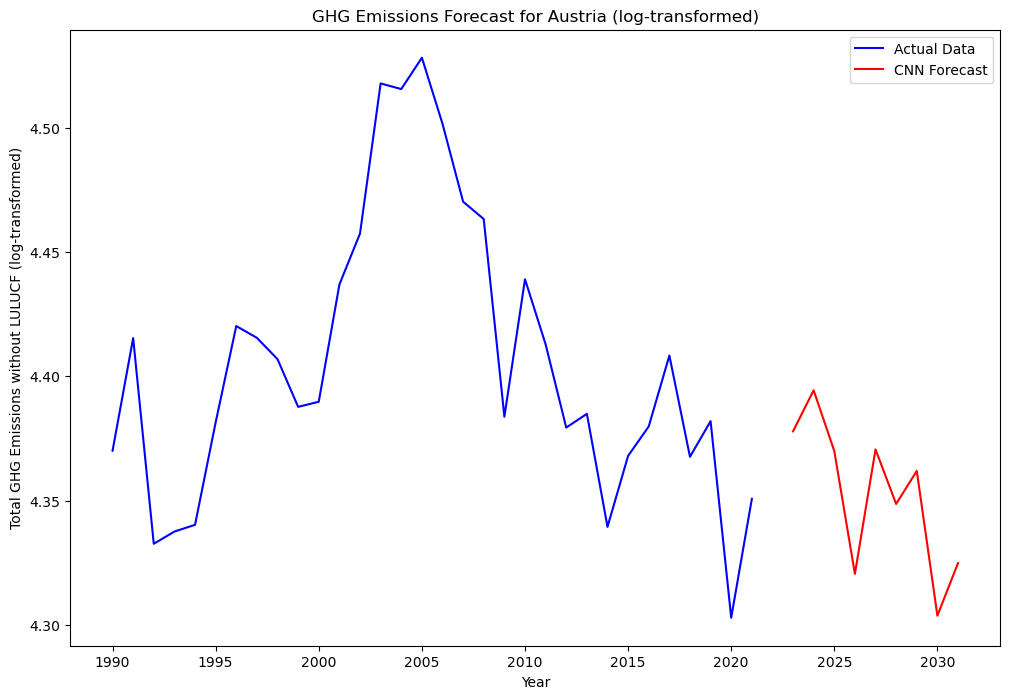

            CNN Forecast
2022-12-31     79.665733
2023-12-31     80.994095
2024-12-31     79.035446
2025-12-31     75.226372
2026-12-31     79.088829
2027-12-31     77.372864
2028-12-31     78.406708
2029-12-31     73.970947
2030-12-31     75.552490


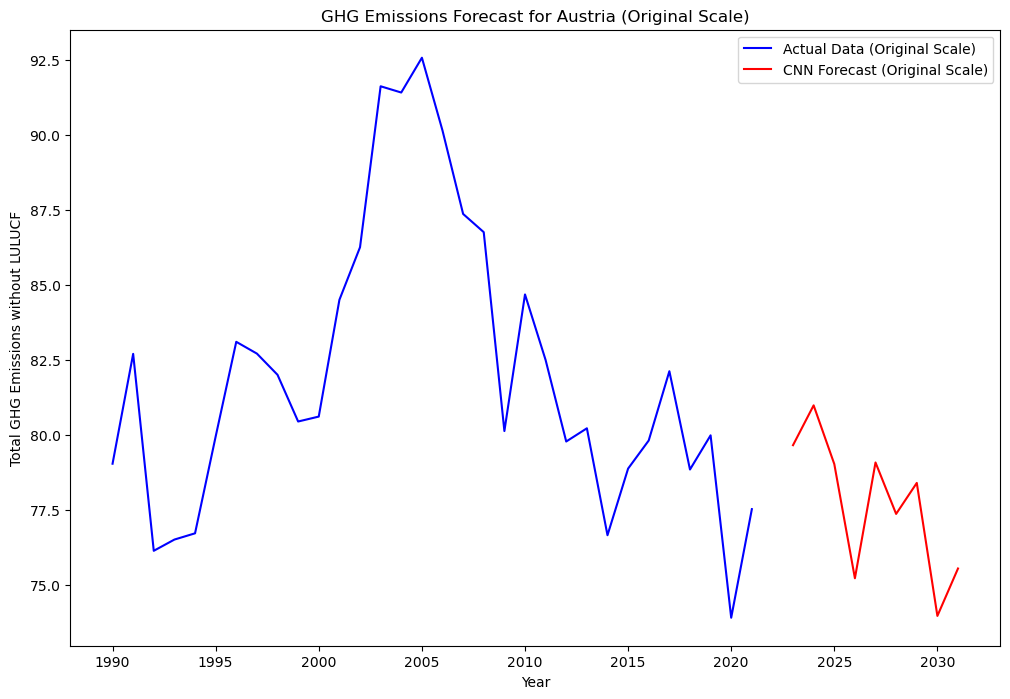

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Metrics for Belgium (Fold 1):
MAE : 0.10677262740177558
MSE : 0.013057379140710779
RMSE : 0.11426888964504196
MAPE : 0.0218541914178156
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Metrics for Belgium (Fold 2):
MAE : 0.072777985521063
MSE : 0.00680899848429526
RMSE : 0.08251665579927037
MAPE : 0.01513247630989408
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Metrics for Belgium (Fold 3):
MAE : 0.14810025002225982
MSE : 0.022411858558286896
RMSE : 0.14970590689176863
MAPE : 0.03105795660833231
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Metrics for Belgium (Fold 4):
MAE : 0.0883262328116509
MSE : 0.00804109714800685
RMSE : 0.08967216484510035
MAPE : 0.018538000111866224
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Metrics for Belgium (Fold 5):
MAE : 0.09735523743162637
MSE : 0.01004474775996394
RMSE : 0.10022348906301327
MAPE : 0.020685757293539705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
            CNN Forecast
2022-12-31      4.717017
2023-12-31      4.741882
2024-12-31  

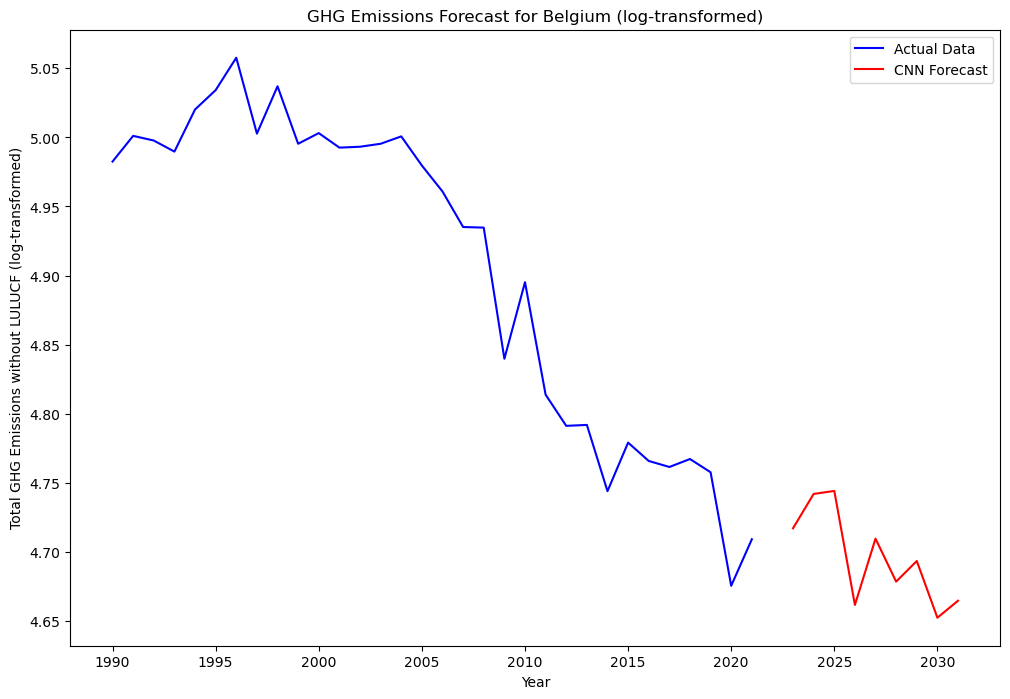

            CNN Forecast
2022-12-31    111.834129
2023-12-31    114.649811
2024-12-31    114.898933
2025-12-31    105.797325
2026-12-31    110.998589
2027-12-31    107.598648
2028-12-31    109.216095
2029-12-31    104.821800
2030-12-31    106.118401


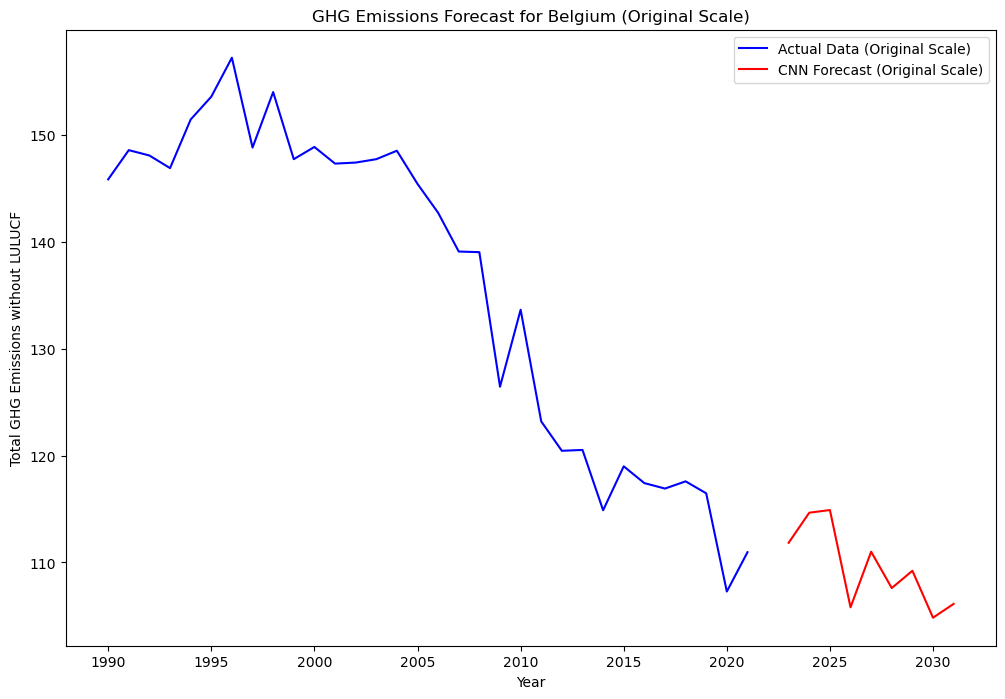

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Metrics for Bulgaria (Fold 1):
MAE : 0.14771554274964002
MSE : 0.02480302648742626
RMSE : 0.15748976629427786
MAPE : 0.03543381364658307
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Metrics for Bulgaria (Fold 2):
MAE : 0.17843072178142064
MSE : 0.0347620439349726
RMSE : 0.18644582037410384
MAPE : 0.04324825905303109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Metrics for Bulgaria (Fold 3):
MAE : 0.03912315587093159
MSE : 0.002531965909617044
RMSE : 0.05031864375772706
MAPE : 0.009581195380705832
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Metrics for Bulgaria (Fold 4):
MAE : 0.15058724452098016
MSE : 0.02546124787215502
RMSE : 0.15956581047378232
MAPE : 0.037067063208621055
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Metrics for Bulgaria (Fold 5):
MAE : 0.1659560744660502
MSE : 0.028720663153077964
RMSE : 0.16947171785604218
MAPE : 0.04215325722689187
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
            CNN Forecast
2022-12-31      3.818954
2023-12-31      3.975595
2024-12-

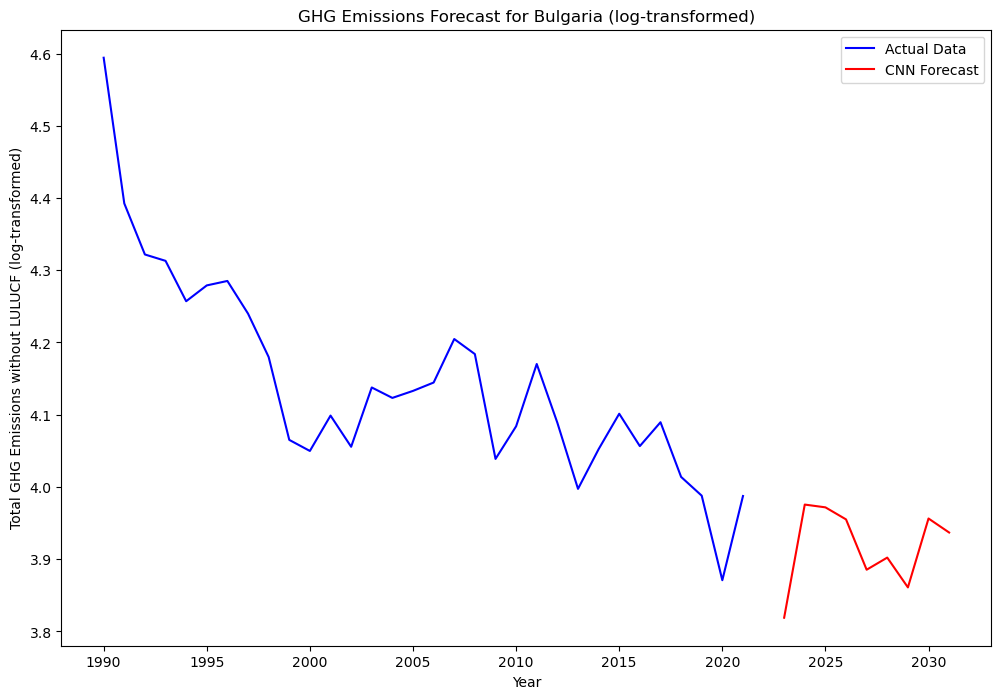

            CNN Forecast
2022-12-31     45.556511
2023-12-31     53.281784
2024-12-31     53.077602
2025-12-31     52.199375
2026-12-31     48.686310
2027-12-31     49.510956
2028-12-31     47.509106
2029-12-31     52.263641
2030-12-31     51.259655


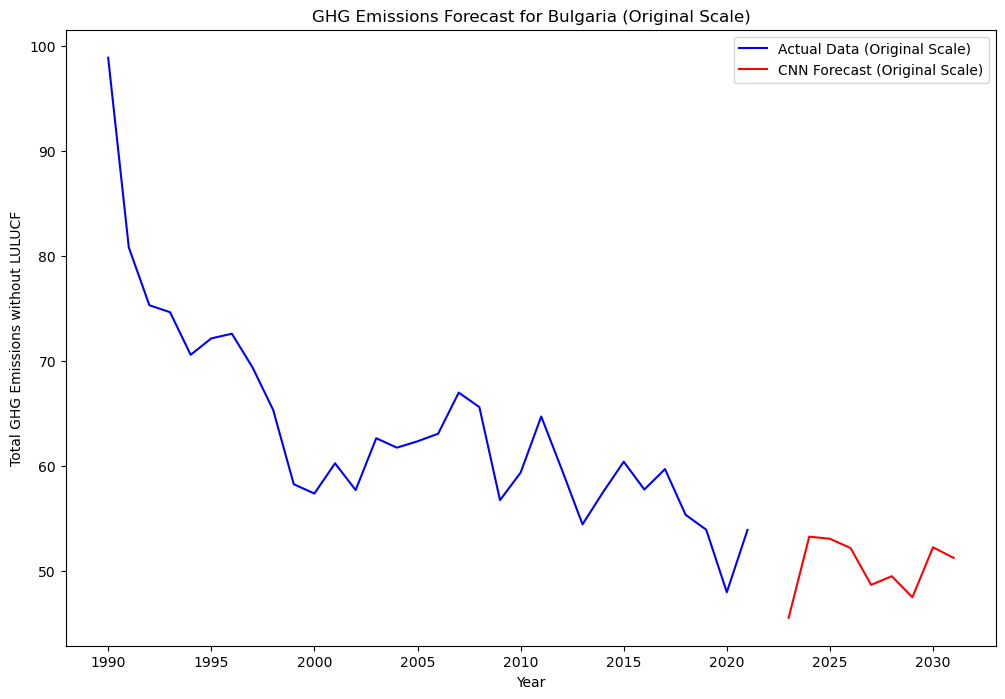

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Metrics for Canada (Fold 1):
MAE : 0.13425587169640943
MSE : 0.02063133795398675
RMSE : 0.14363613039199696
MAPE : 0.020436476957548185
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Metrics for Canada (Fold 2):
MAE : 0.15640211861259848
MSE : 0.02448284161428543
RMSE : 0.15646993837247278
MAPE : 0.023823538755995743
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Metrics for Canada (Fold 3):
MAE : 0.04462640323975986
MSE : 0.002030247530261895
RMSE : 0.04505826816758379
MAPE : 0.006780150995673719
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Metrics for Canada (Fold 4):
MAE : 0.05301973375519372
MSE : 0.002820511573178388
RMSE : 0.05310848871111273
MAPE : 0.008069827547695847
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Metrics for Canada (Fold 5):
MAE : 0.21200652967600764
MSE : 0.04559741965396031
RMSE : 0.21353552316642846
MAPE : 0.03250328422569698
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
            CNN Forecast
2022-12-31      6.669545
2023-12-31      6.469789
2024-12-31   

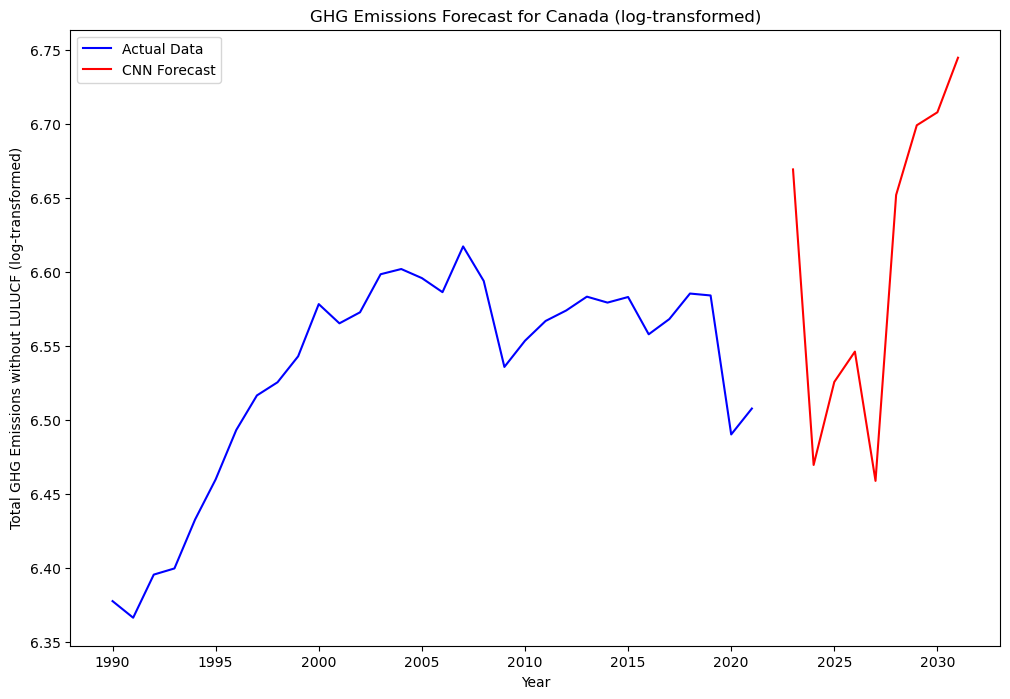

            CNN Forecast
2022-12-31    788.036743
2023-12-31    645.347229
2024-12-31    682.591187
2025-12-31    696.730164
2026-12-31    638.433655
2027-12-31    774.537842
2028-12-31    811.905334
2029-12-31    819.062866
2030-12-31    849.833069


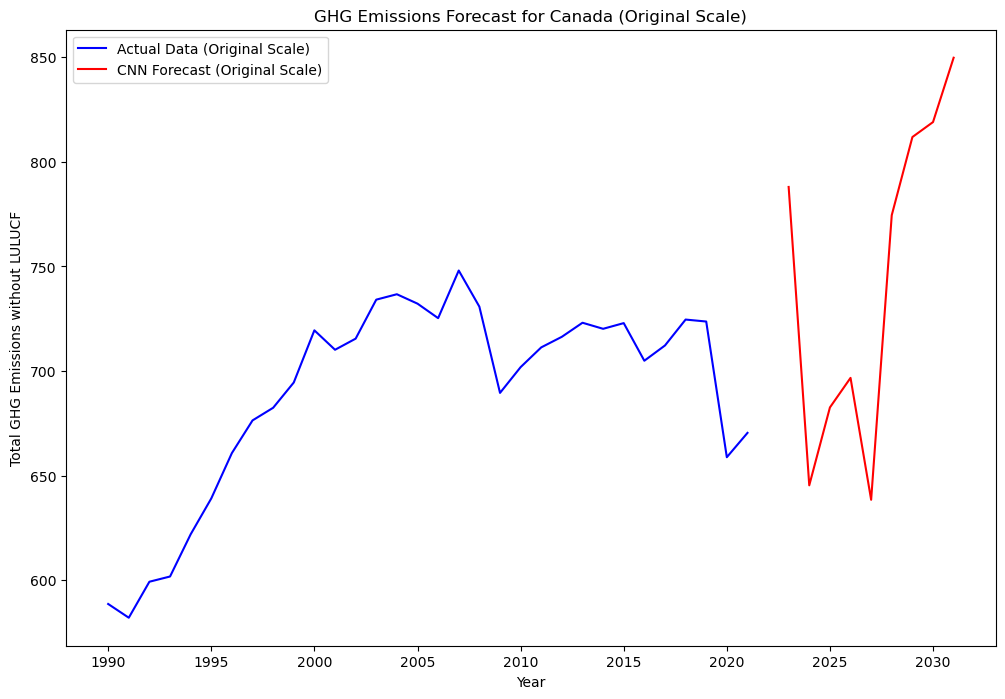

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Metrics for Czechia (Fold 1):
MAE : 0.033909562798097724
MSE : 0.001447440975530731
RMSE : 0.03804524905334083
MAPE : 0.00678351580516065
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Metrics for Czechia (Fold 2):
MAE : 0.03272078569242609
MSE : 0.0016083312573899238
RMSE : 0.0401040055030657
MAPE : 0.0066276294920144
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Metrics for Czechia (Fold 3):
MAE : 0.030184186920480787
MSE : 0.0009591377197860758
RMSE : 0.03096994865649725
MAPE : 0.006220258843718007
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Metrics for Czechia (Fold 4):
MAE : 0.017843229425904106
MSE : 0.0003756347719028349
RMSE : 0.019381299541125586
MAPE : 0.0036670896120131516
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Metrics for Czechia (Fold 5):
MAE : 0.06258694218239717
MSE : 0.004635349227689769
RMSE : 0.06808339906092946
MAPE : 0.013144973950050135
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
            CNN Forecast
2022-12-31      4.718463
2023-12-31      4.718043

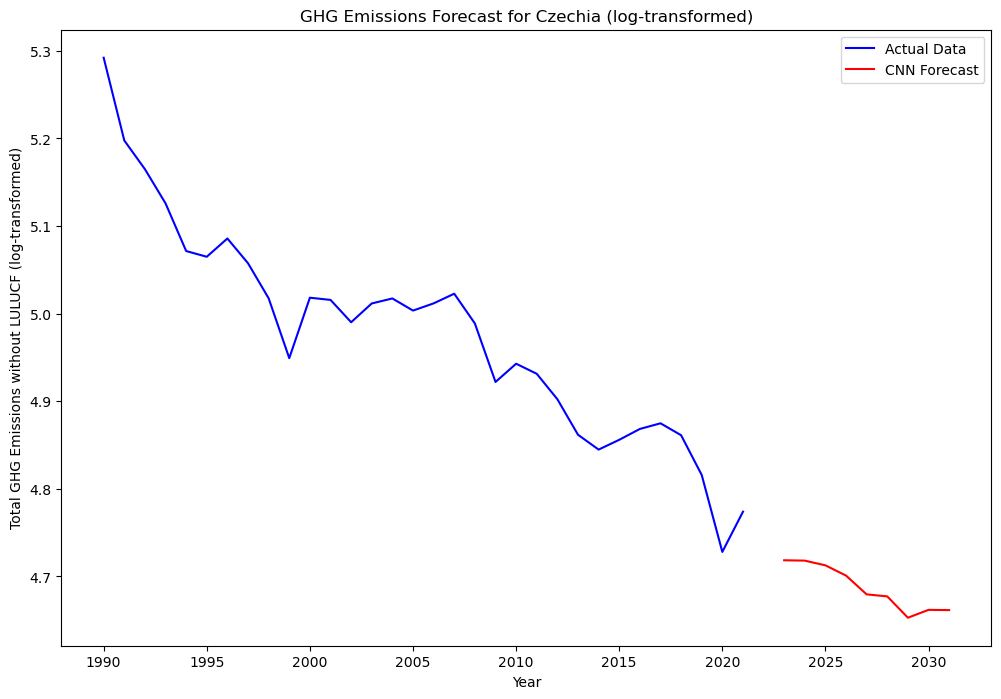

            CNN Forecast
2022-12-31    111.996033
2023-12-31    111.948936
2024-12-31    111.349312
2025-12-31    110.053001
2026-12-31    107.717758
2027-12-31    107.472198
2028-12-31    104.885994
2029-12-31    105.831383
2030-12-31    105.802269


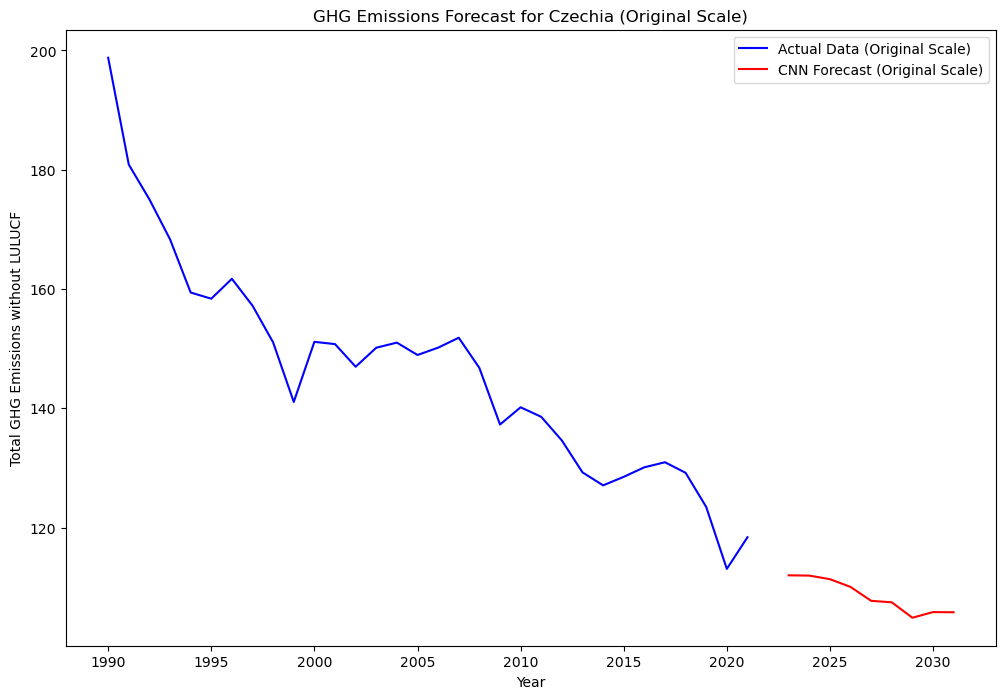

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Metrics for Denmark (Fold 1):
MAE : 0.14844028133302137
MSE : 0.022548890805413186
RMSE : 0.15016288091739977
MAPE : 0.035098475138241304
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Metrics for Denmark (Fold 2):
MAE : 0.04961611228364049
MSE : 0.004109189688166796
RMSE : 0.06410296161775052
MAPE : 0.0122408889741645
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Metrics for Denmark (Fold 3):
MAE : 0.17520220349745955
MSE : 0.033427403013433055
RMSE : 0.1828316247628759
MAPE : 0.04409663072154512
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Metrics for Denmark (Fold 4):
MAE : 0.1353410327341873
MSE : 0.018974537076566128
RMSE : 0.13774809282369802
MAPE : 0.03437393518686558
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Metrics for Denmark (Fold 5):
MAE : 0.14526635800625268
MSE : 0.02134583810666242
RMSE : 0.14610214956208695
MAPE : 0.03802240905120646
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
            CNN Forecast
2022-12-31      3.742278
2023-12-31      3.729337
2024-12-31  

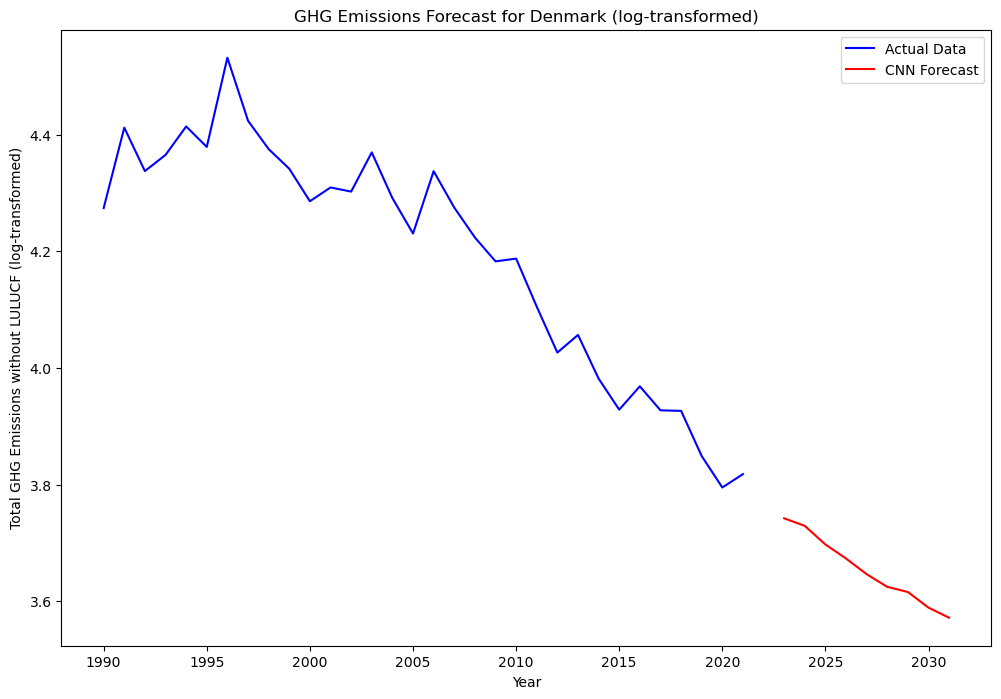

            CNN Forecast
2022-12-31     42.193985
2023-12-31     41.651493
2024-12-31     40.342129
2025-12-31     39.381737
2026-12-31     38.340370
2027-12-31     37.515766
2028-12-31     37.186749
2029-12-31     36.201141
2030-12-31     35.582405


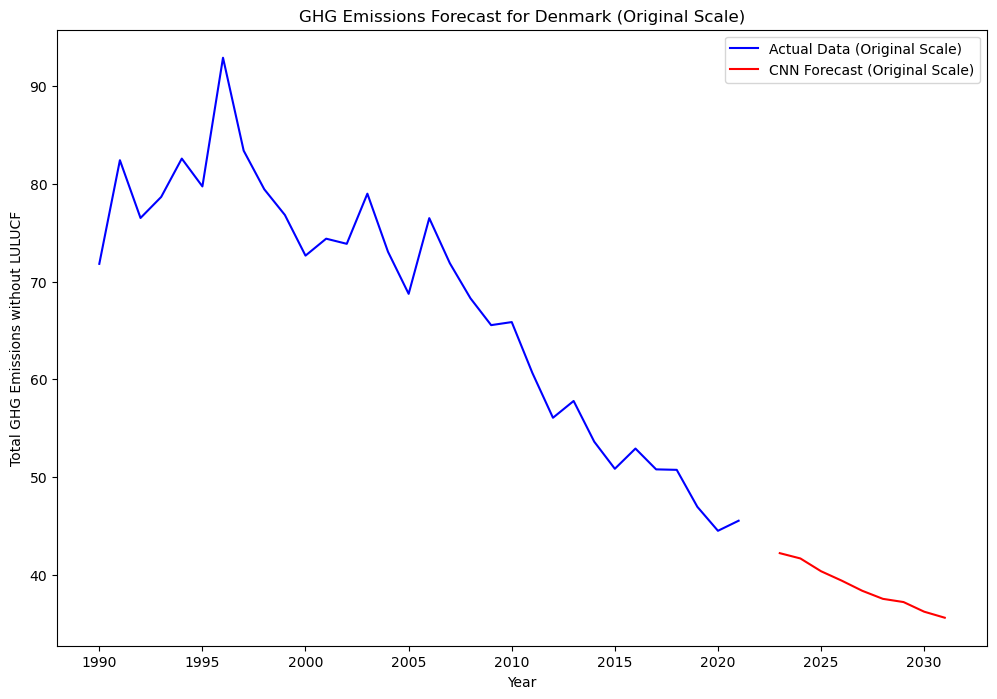

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Metrics for Finland (Fold 1):
MAE : 0.04969289621192393
MSE : 0.0025661604627439834
RMSE : 0.050657284399619994
MAPE : 0.011572937526680935
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Metrics for Finland (Fold 2):
MAE : 0.10231671061754266
MSE : 0.014070558044975373
RMSE : 0.11861938309136232
MAPE : 0.024397093200006992
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Metrics for Finland (Fold 3):
MAE : 0.18410378863865015
MSE : 0.038234764338463206
RMSE : 0.19553711754667757
MAPE : 0.04543056340036981
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Metrics for Finland (Fold 4):
MAE : 0.31136865073785963
MSE : 0.09829731115768288
RMSE : 0.3135240200649432
MAPE : 0.07731139607121923
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Metrics for Finland (Fold 5):
MAE : 0.27728832399563447
MSE : 0.07943344697252024
RMSE : 0.2818393992551791
MAPE : 0.07127246510344548
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
            CNN Forecast
2022-12-31      3.919732
2023-12-31      3.921569
2024-12-31  

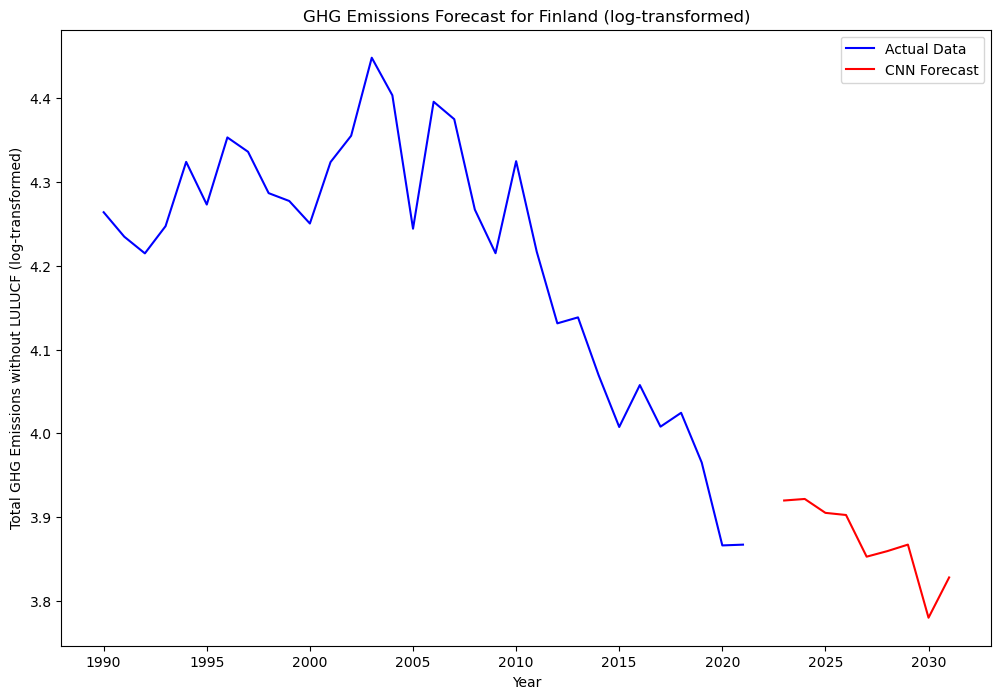

            CNN Forecast
2022-12-31     50.386944
2023-12-31     50.479576
2024-12-31     49.648525
2025-12-31     49.522430
2026-12-31     47.118092
2027-12-31     47.430580
2028-12-31     47.801647
2029-12-31     43.805992
2030-12-31     45.964272


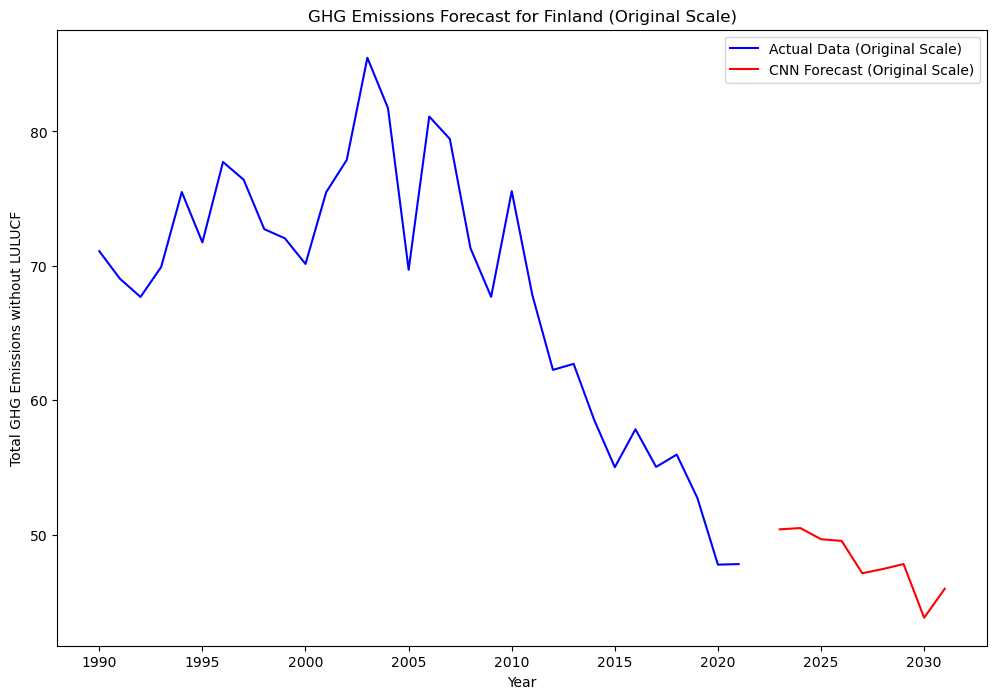

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Metrics for France (Fold 1):
MAE : 0.13372984584886627
MSE : 0.019052708779255193
RMSE : 0.13803154994150862
MAPE : 0.021346792197371196
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Metrics for France (Fold 2):
MAE : 0.12787751312848408
MSE : 0.016693605661322598
RMSE : 0.12920373702537633
MAPE : 0.02062083298757216
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Metrics for France (Fold 3):
MAE : 0.13503433106608723
MSE : 0.01929475400824444
RMSE : 0.1389055578738462
MAPE : 0.021987217379511648
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Metrics for France (Fold 4):
MAE : 0.035927155371798136
MSE : 0.0013400228636927178
RMSE : 0.03660632272835825
MAPE : 0.005862343495116866
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Metrics for France (Fold 5):
MAE : 0.13153460194469346
MSE : 0.01849549476360427
RMSE : 0.13599814250056605
MAPE : 0.021826920528995288
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
            CNN Forecast
2022-12-31      6.052230
2023-12-31      6.053097
2024-12-31

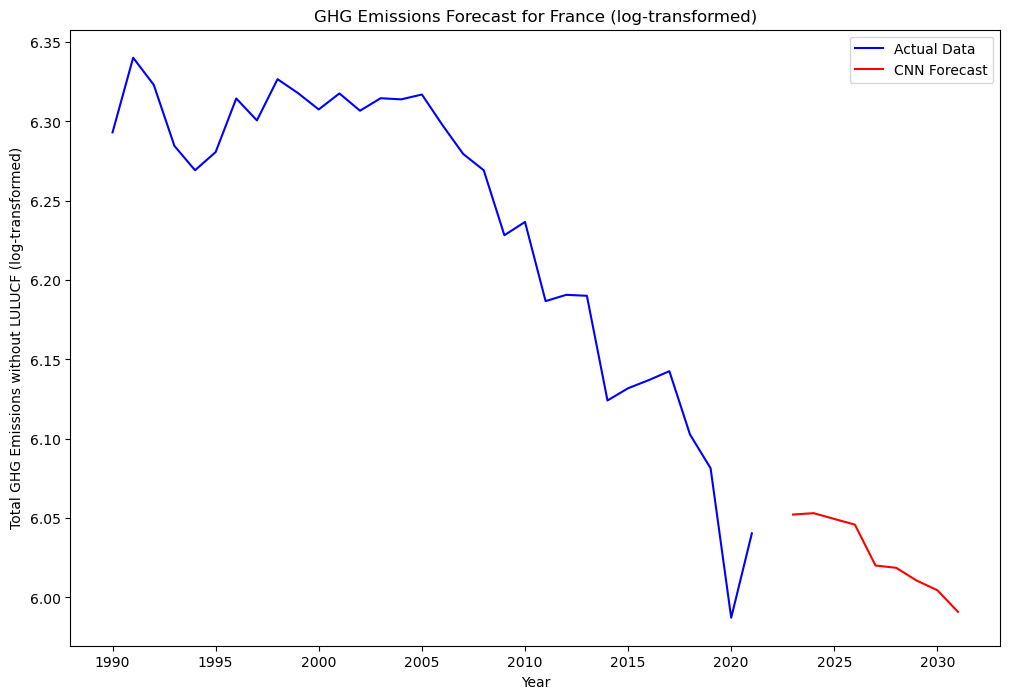

            CNN Forecast
2022-12-31    425.059784
2023-12-31    425.428650
2024-12-31    423.888885
2025-12-31    422.366974
2026-12-31    411.622345
2027-12-31    411.030212
2028-12-31    407.720154
2029-12-31    405.254639
2030-12-31    399.769318


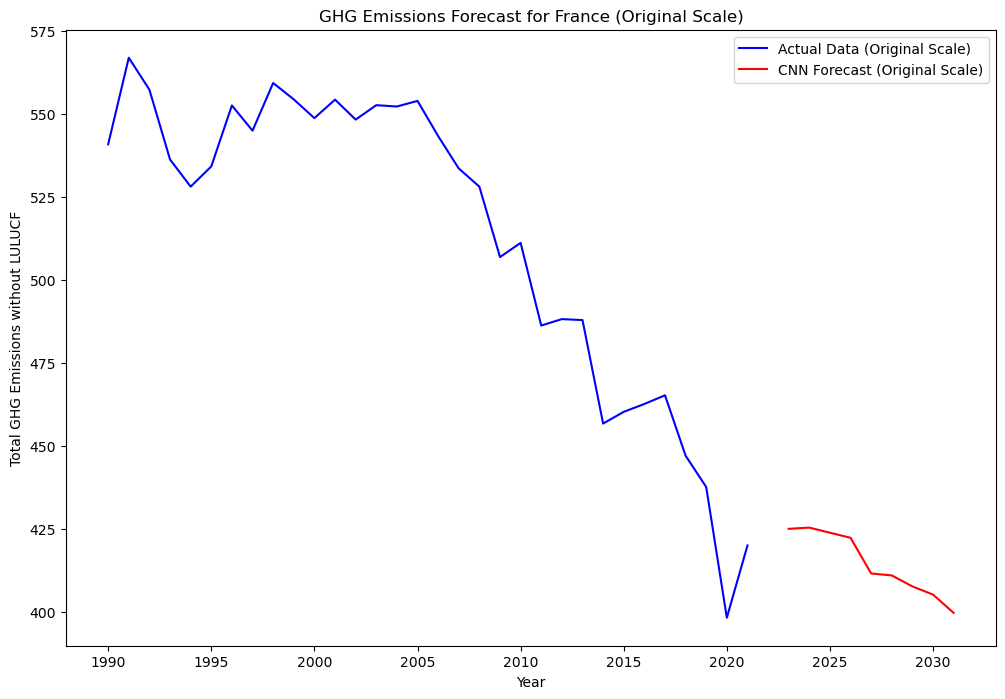

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Metrics for Germany (Fold 1):
MAE : 0.9186314112470754
MSE : 0.8444262879209549
RMSE : 0.9189267043246457
MAPE : 0.13412855059750364
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Metrics for Germany (Fold 2):
MAE : 0.007088440236050412
MSE : 0.00012270612820648136
RMSE : 0.011077279819815032
MAPE : 0.0010369917295223513
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Metrics for Germany (Fold 3):
MAE : 0.01167479386377579
MSE : 0.00018267842246368288
RMSE : 0.013515858184506187
MAPE : 0.001712498411489279
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Metrics for Germany (Fold 4):
MAE : 0.018527286519486392
MSE : 0.0003860403657779857
RMSE : 0.019647909959534773
MAPE : 0.0027326776043259545
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Metrics for Germany (Fold 5):
MAE : 0.09276752609846668
MSE : 0.009181691894551524
RMSE : 0.09582114534147211
MAPE : 0.013998648867410703
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
            CNN Forecast
2022-12-31      6.676123
2023-12-31      6.66152

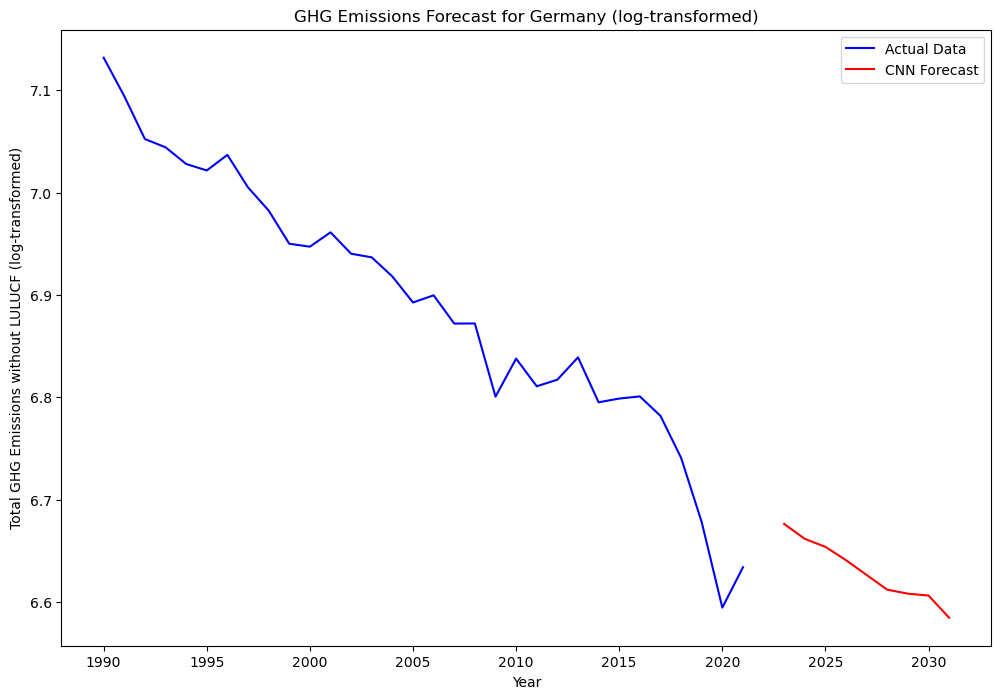

            CNN Forecast
2022-12-31    793.237427
2023-12-31    781.744629
2024-12-31    775.651794
2025-12-31    765.624451
2026-12-31    754.612549
2027-12-31    743.863098
2028-12-31    740.960144
2029-12-31    739.603210
2030-12-31    723.742310


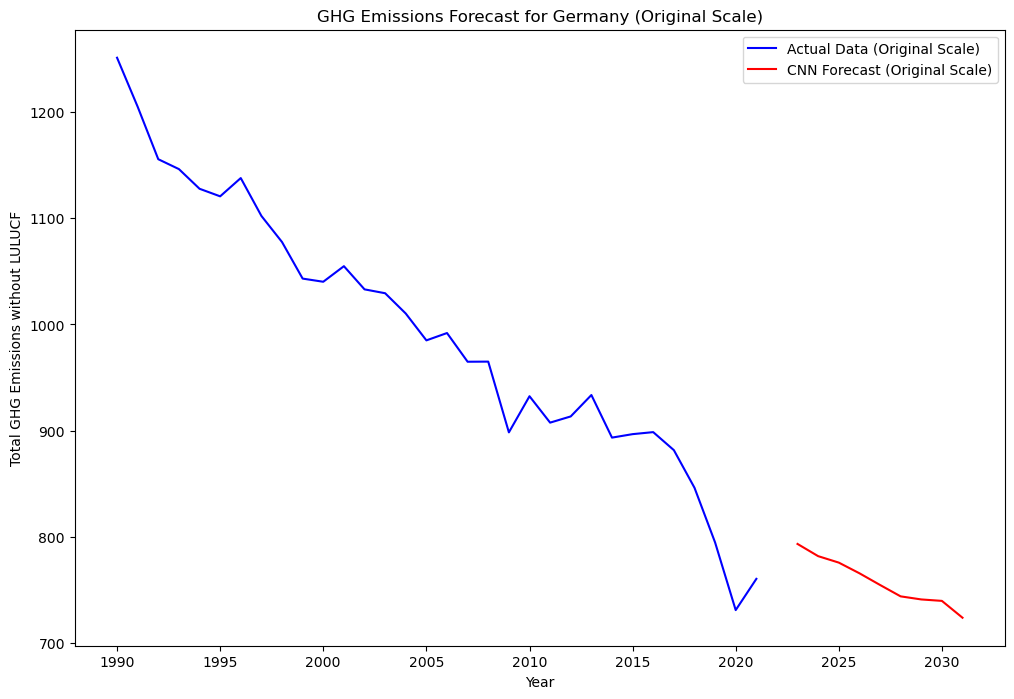

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Metrics for Greece (Fold 1):
MAE : 0.12845082666324034
MSE : 0.02090774911249028
RMSE : 0.1445951213301828
MAPE : 0.026436968201345085
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Metrics for Greece (Fold 2):
MAE : 0.059101854576508295
MSE : 0.005213134630744937
RMSE : 0.07220204035029022
MAPE : 0.012471813466672657
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Metrics for Greece (Fold 3):
MAE : 0.539757671598208
MSE : 0.2935803369735173
RMSE : 0.5418305426731842
MAPE : 0.11736979852576568
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Metrics for Greece (Fold 4):
MAE : 0.4153322468398297
MSE : 0.1727973410941346
RMSE : 0.41568899563752537
MAPE : 0.0914901273716534
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Metrics for Greece (Fold 5):
MAE : 0.4387931549904662
MSE : 0.1943883516231307
RMSE : 0.4408949439754676
MAPE : 0.1003720548885773
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
            CNN Forecast
2022-12-31      4.424433
2023-12-31      4.463103
2024-12-31      4.469506
2

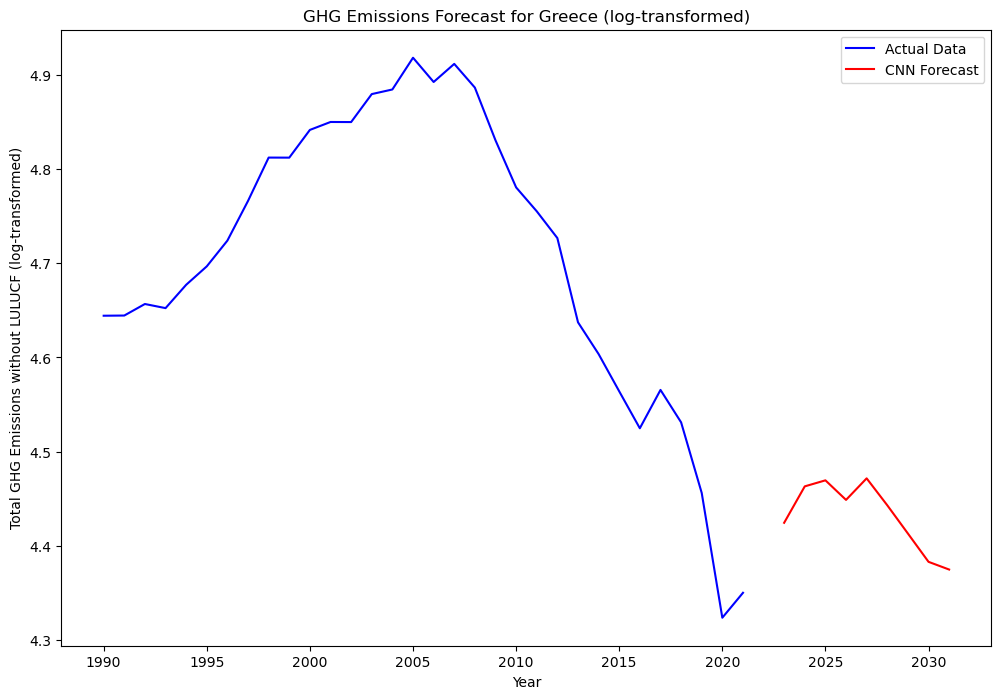

            CNN Forecast
2022-12-31     83.465439
2023-12-31     86.756325
2024-12-31     87.313599
2025-12-31     85.519814
2026-12-31     87.497566
2027-12-31     85.034988
2028-12-31     82.519798
2029-12-31     80.076981
2030-12-31     79.424843


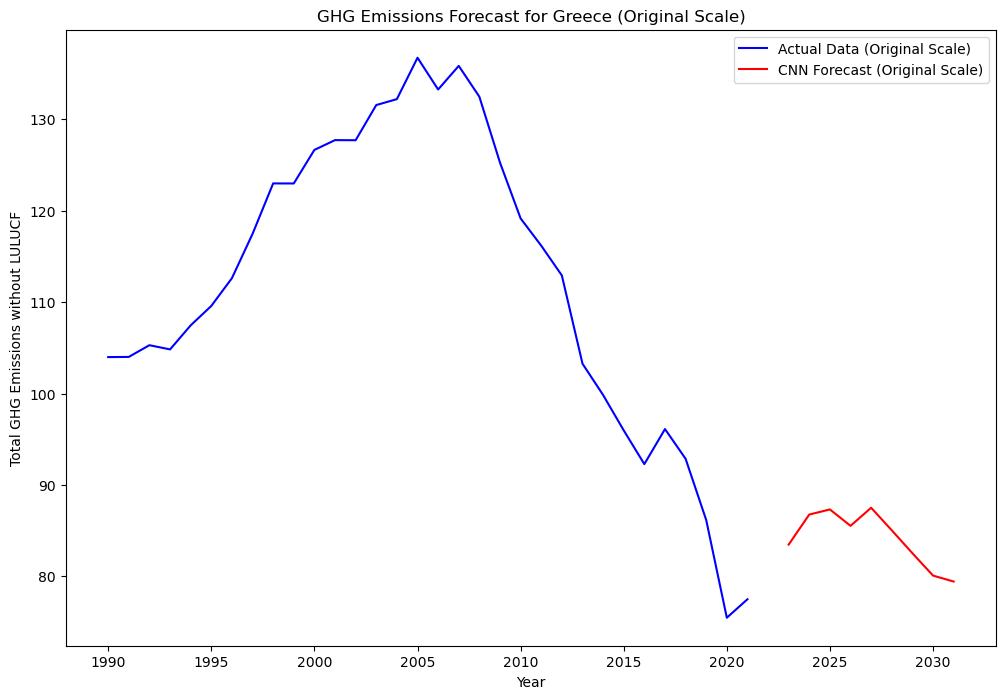

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Metrics for Ireland (Fold 1):
MAE : 0.2149224620783811
MSE : 0.05320193459254435
RMSE : 0.230655445616496
MAPE : 0.05122716099027944
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Metrics for Ireland (Fold 2):
MAE : 0.29101445845336443
MSE : 0.08797734354451259
RMSE : 0.29660974957764386
MAPE : 0.07100893685972848
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Metrics for Ireland (Fold 3):
MAE : 0.30297335381967166
MSE : 0.09186270003363538
RMSE : 0.30308860096287915
MAPE : 0.07394541482022508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Metrics for Ireland (Fold 4):
MAE : 0.2088167759061911
MSE : 0.04362713241730162
RMSE : 0.20887109042972324
MAPE : 0.0502633373459739
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Metrics for Ireland (Fold 5):
MAE : 0.1568215909251114
MSE : 0.027654628714290322
RMSE : 0.1662968090923284
MAPE : 0.038228161922335774
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
            CNN Forecast
2022-12-31      4.073157
2023-12-31      4.096612
2024-12-31      4.09

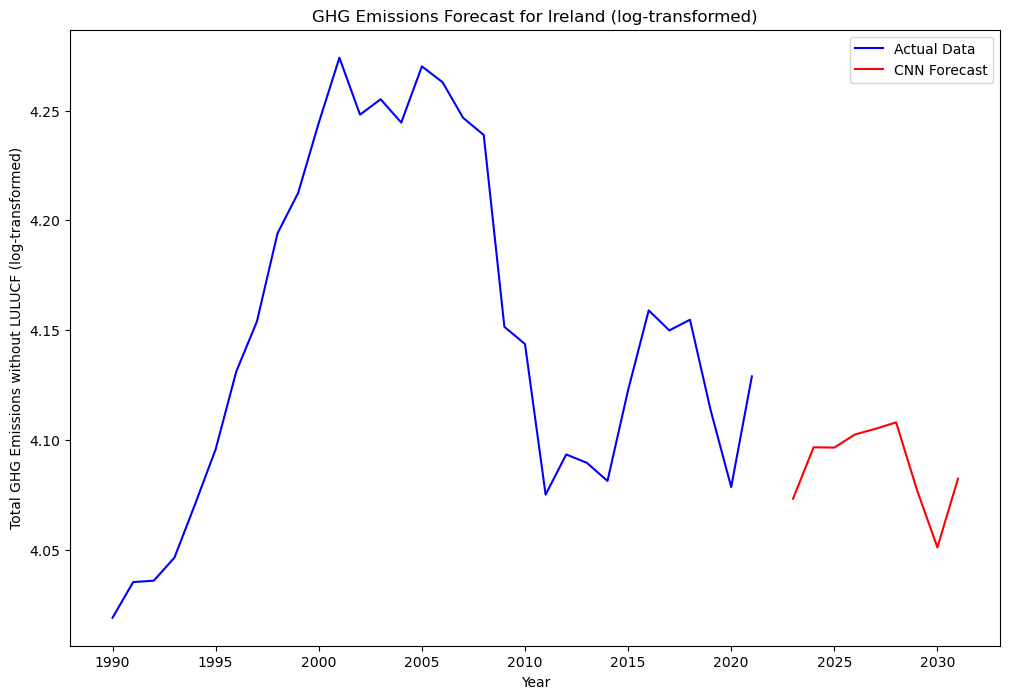

            CNN Forecast
2022-12-31     58.742111
2023-12-31     60.136200
2024-12-31     60.127197
2025-12-31     60.487347
2026-12-31     60.643932
2027-12-31     60.822437
2028-12-31     58.993534
2029-12-31     57.454563
2030-12-31     59.280796


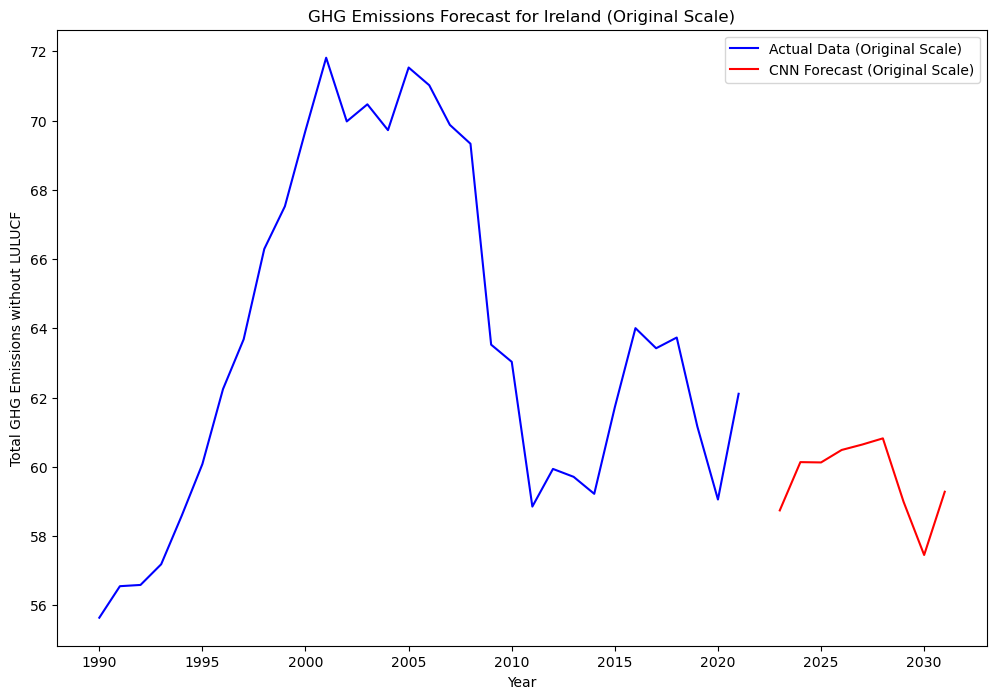

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Metrics for Italy (Fold 1):
MAE : 0.07284485647919296
MSE : 0.010061719930829272
RMSE : 0.10030812494922468
MAPE : 0.01163367971520758
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Metrics for Italy (Fold 2):
MAE : 0.176830280325427
MSE : 0.03208379520594986
RMSE : 0.17911949979259617
MAPE : 0.028395452711741473
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Metrics for Italy (Fold 3):
MAE : 0.18332705925446233
MSE : 0.03446278283777839
RMSE : 0.18564154394363994
MAPE : 0.030069373360239415
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Metrics for Italy (Fold 4):
MAE : 0.2501657107795001
MSE : 0.06258851186285759
RMSE : 0.2501769610952567
MAPE : 0.04113164866220235
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Metrics for Italy (Fold 5):
MAE : 0.22910432849975373
MSE : 0.05479249477906778
RMSE : 0.23407796730804842
MAPE : 0.038150161069019535
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
            CNN Forecast
2022-12-31      5.945714
2023-12-31      5.981709
2024-12-31      5.945651

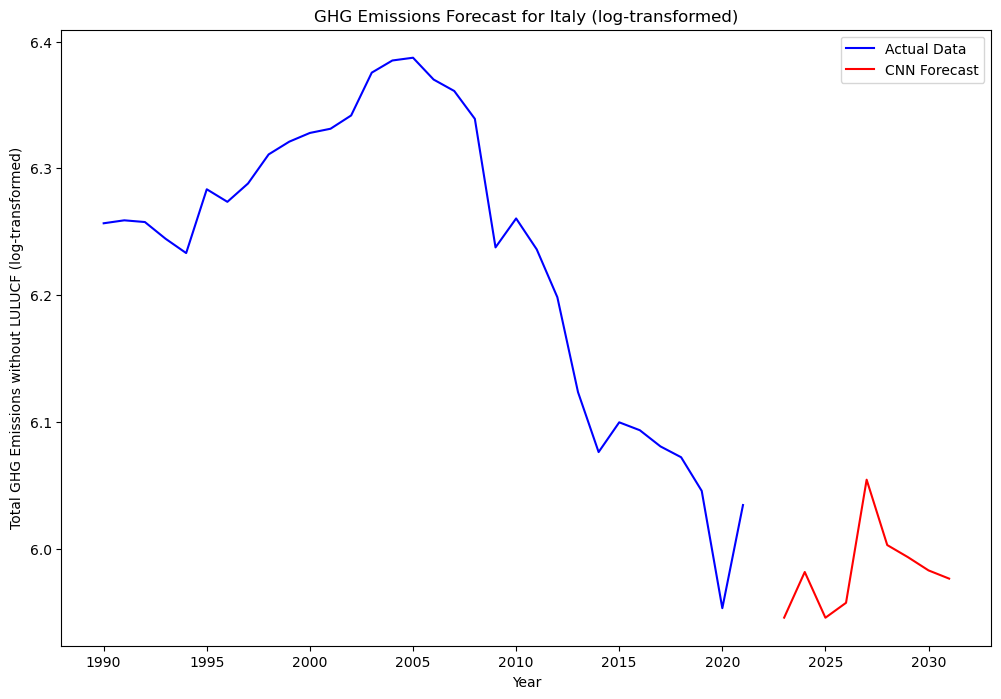

            CNN Forecast
2022-12-31    382.112244
2023-12-31    396.116943
2024-12-31    382.087830
2025-12-31    386.608185
2026-12-31    426.022827
2027-12-31    404.617859
2028-12-31    400.779938
2029-12-31    396.614380
2030-12-31    394.053864


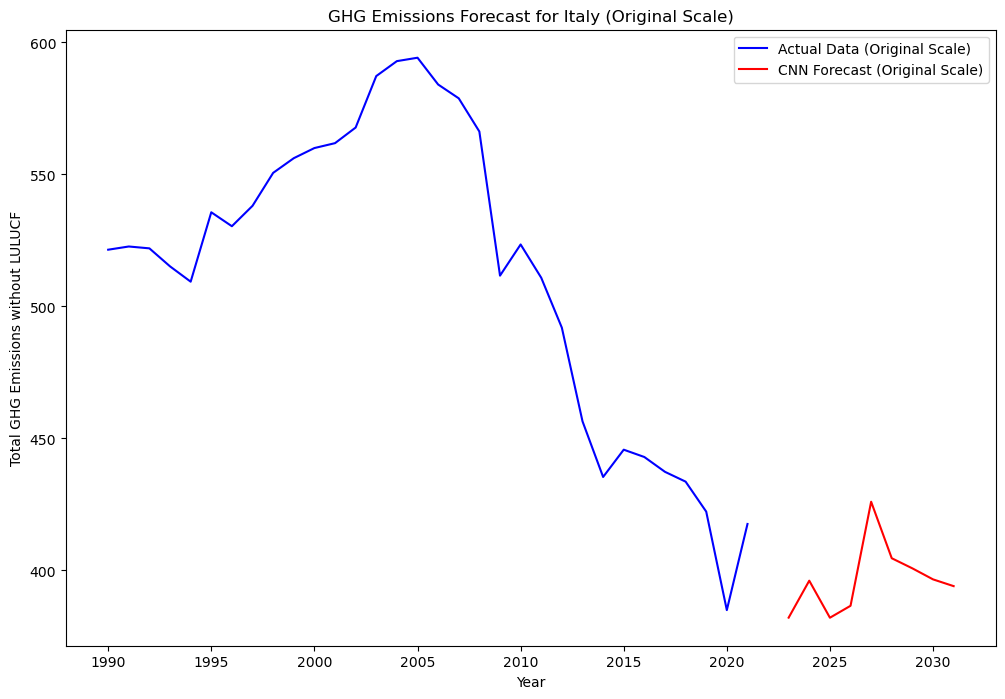

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Metrics for Japan (Fold 1):
MAE : 0.0765607072055398
MSE : 0.007561438540120642
RMSE : 0.08695653247525825
MAPE : 0.01069415322368434
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Metrics for Japan (Fold 2):
MAE : 0.05346422753563503
MSE : 0.0033932080440365418
RMSE : 0.05825124929163787
MAPE : 0.007432103484416302
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Metrics for Japan (Fold 3):
MAE : 0.04030977362366587
MSE : 0.0023918729503554247
RMSE : 0.048906778163721076
MAPE : 0.005601136242663572
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Metrics for Japan (Fold 4):
MAE : 0.1583569939222921
MSE : 0.025528609511499396
RMSE : 0.15977674897024097
MAPE : 0.022150713510404495
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Metrics for Japan (Fold 5):
MAE : 0.13167227772069534
MSE : 0.017395399946948678
RMSE : 0.13189162197406126
MAPE : 0.01863375827489846
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
            CNN Forecast
2022-12-31      7.128035
2023-12-31      7.106955
2024-12-31    

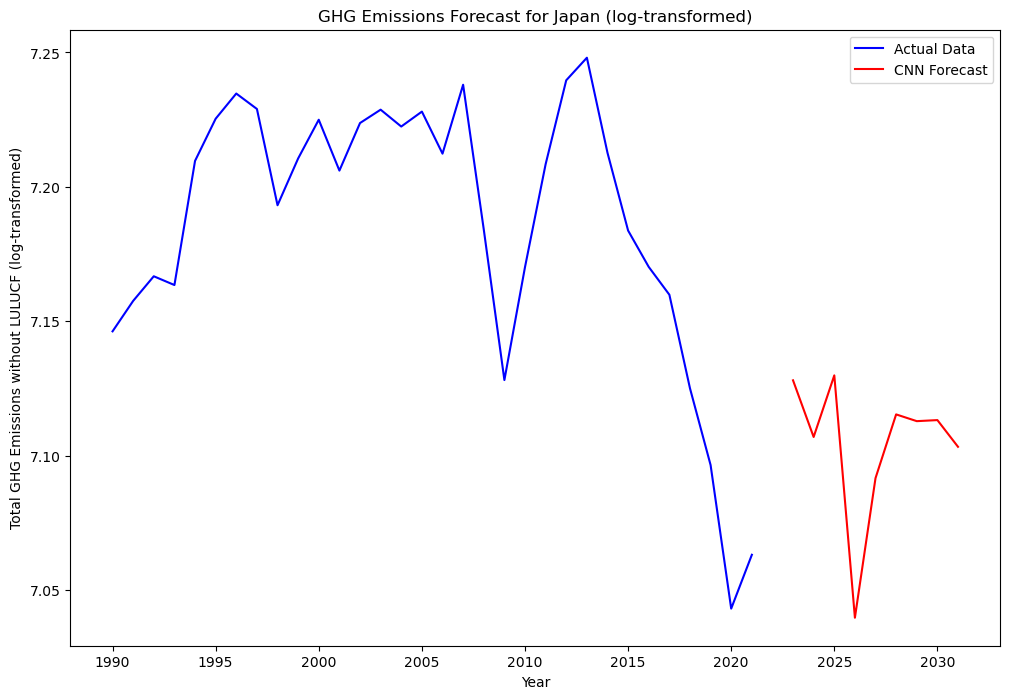

            CNN Forecast
2022-12-31   1246.425537
2023-12-31   1220.425049
2024-12-31   1248.719971
2025-12-31   1141.058838
2026-12-31   1201.882935
2027-12-31   1230.716919
2028-12-31   1227.626953
2029-12-31   1228.110596
2030-12-31   1215.970337


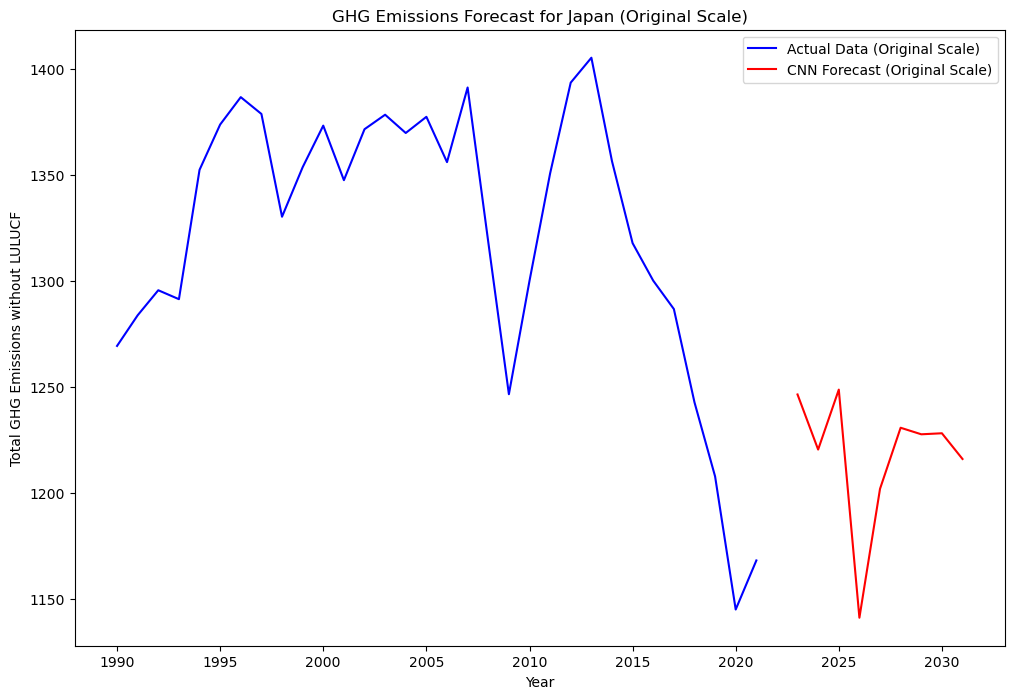

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Metrics for Kazakhstan (Fold 1):
MAE : 0.3648208759882718
MSE : 0.13323710505217934
RMSE : 0.36501658188660324
MAPE : 0.06397055301221401
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Metrics for Kazakhstan (Fold 2):
MAE : 0.3313144694075583
MSE : 0.11012760542649858
RMSE : 0.33185479569609744
MAPE : 0.057713603759221355
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Kazakhstan (Fold 3):
MAE : 0.1640946073667585
MSE : 0.02728439561738119
RMSE : 0.16517988865894417
MAPE : 0.028217552388603268
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for Kazakhstan (Fold 4):
MAE : 0.03309568476885113
MSE : 0.001930865658885367
RMSE : 0.04394161648011333
MAPE : 0.005575487726904056
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Metrics for Kazakhstan (Fold 5):
MAE : 0.0795398053515551
MSE : 0.008218972191908544
RMSE : 0.09065854726339125
MAPE : 0.013663389988555883
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
            CNN Forecast
2022-12-31      5.944245
2023-12-31      5.9417

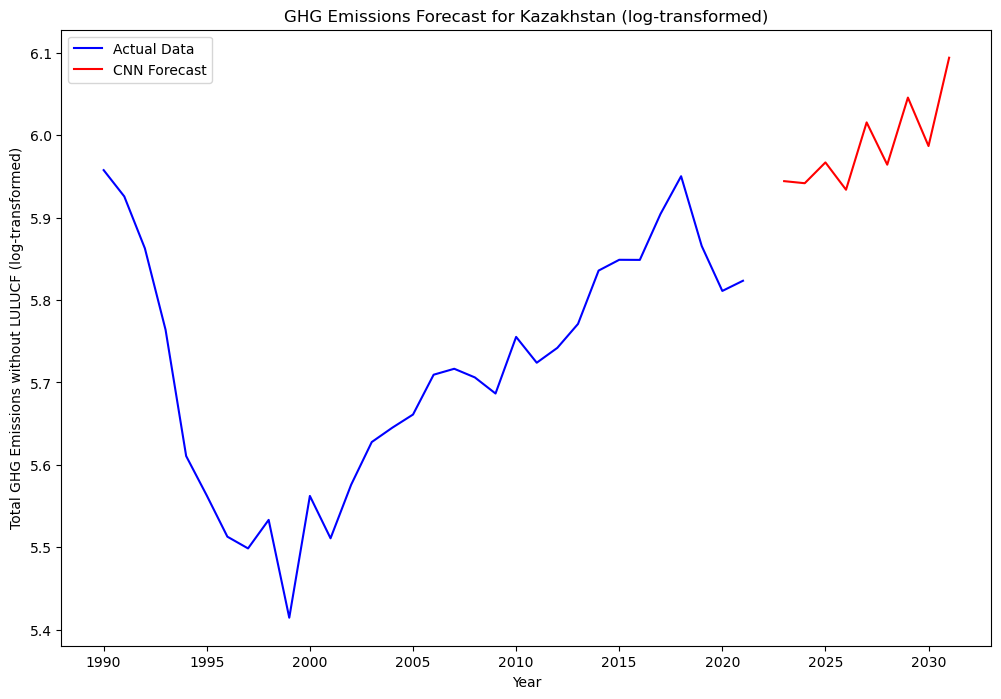

            CNN Forecast
2022-12-31    381.551117
2023-12-31    380.594238
2024-12-31    390.319305
2025-12-31    377.592285
2026-12-31    409.738495
2027-12-31    389.248718
2028-12-31    422.264496
2029-12-31    398.155701
2030-12-31    443.183167


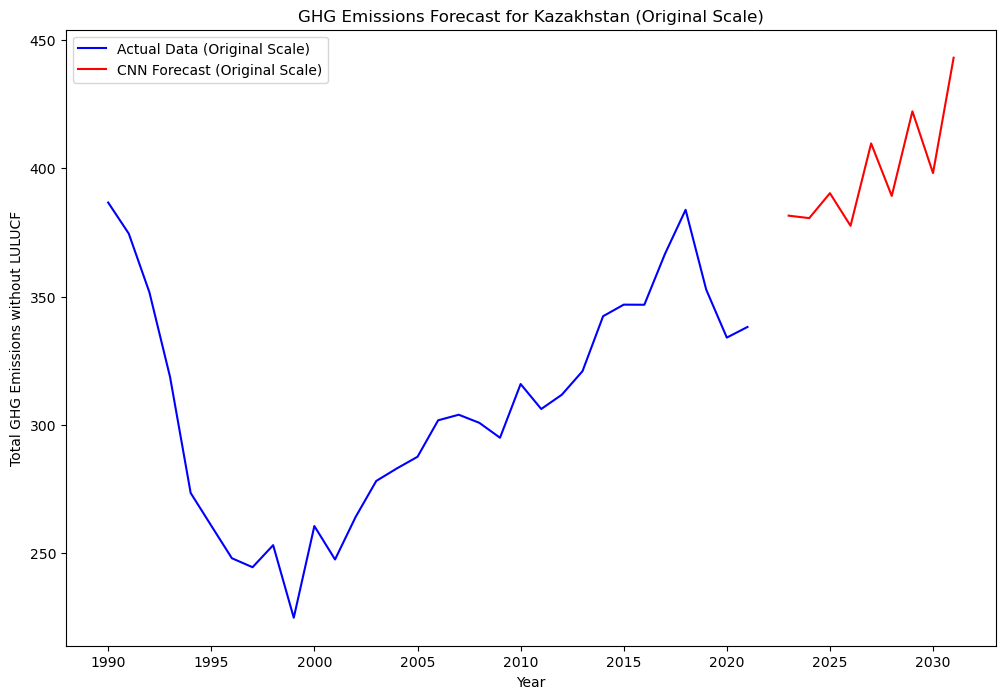

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Metrics for Luxembourg (Fold 1):
MAE : 0.2518575535118955
MSE : 0.06366544175950734
RMSE : 0.2523201176274047
MAPE : 0.10148877192441703
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Metrics for Luxembourg (Fold 2):
MAE : 0.13391536606062004
MSE : 0.02273833038763862
RMSE : 0.15079234193963106
MAPE : 0.05375513739465388
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for Luxembourg (Fold 3):
MAE : 0.18700388232194567
MSE : 0.04448640918571178
RMSE : 0.21091801531806564
MAPE : 0.07927746487900753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for Luxembourg (Fold 4):
MAE : 0.3003030464533099
MSE : 0.09140179812954619
RMSE : 0.30232730298394517
MAPE : 0.12890778250449897
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for Luxembourg (Fold 5):
MAE : 0.24317173423701455
MSE : 0.06398688398677156
RMSE : 0.25295628868793035
MAPE : 0.10815416987441268
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
            CNN Forecast
2022-12-31      2.350736
2023-12-31      2.345878
202

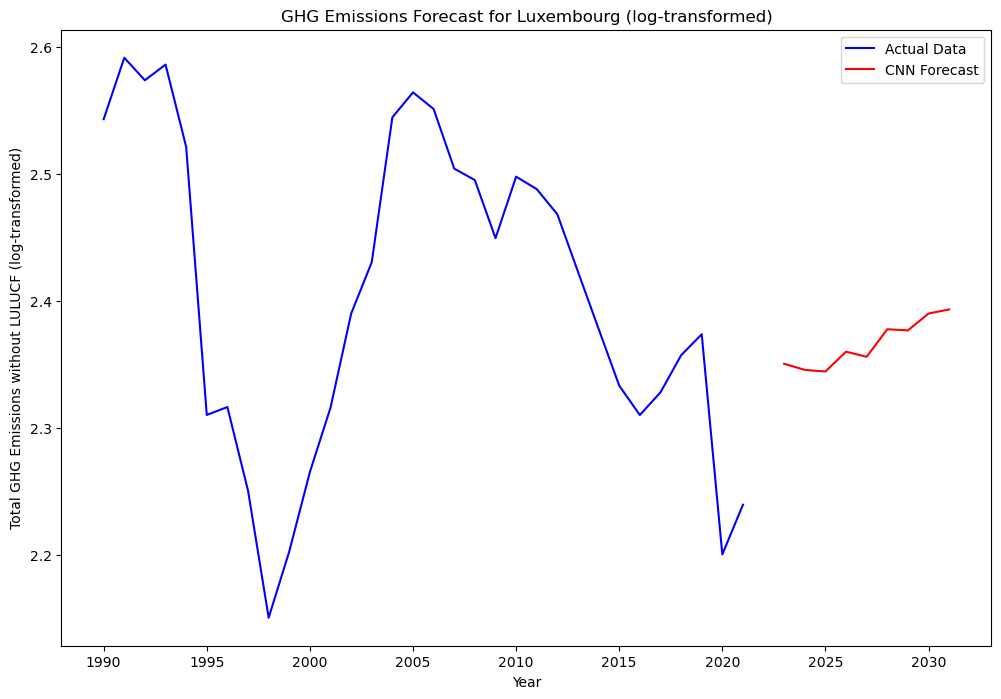

            CNN Forecast
2022-12-31     10.493295
2023-12-31     10.442441
2024-12-31     10.429314
2025-12-31     10.593562
2026-12-31     10.550823
2027-12-31     10.782276
2028-12-31     10.772678
2029-12-31     10.916316
2030-12-31     10.951784


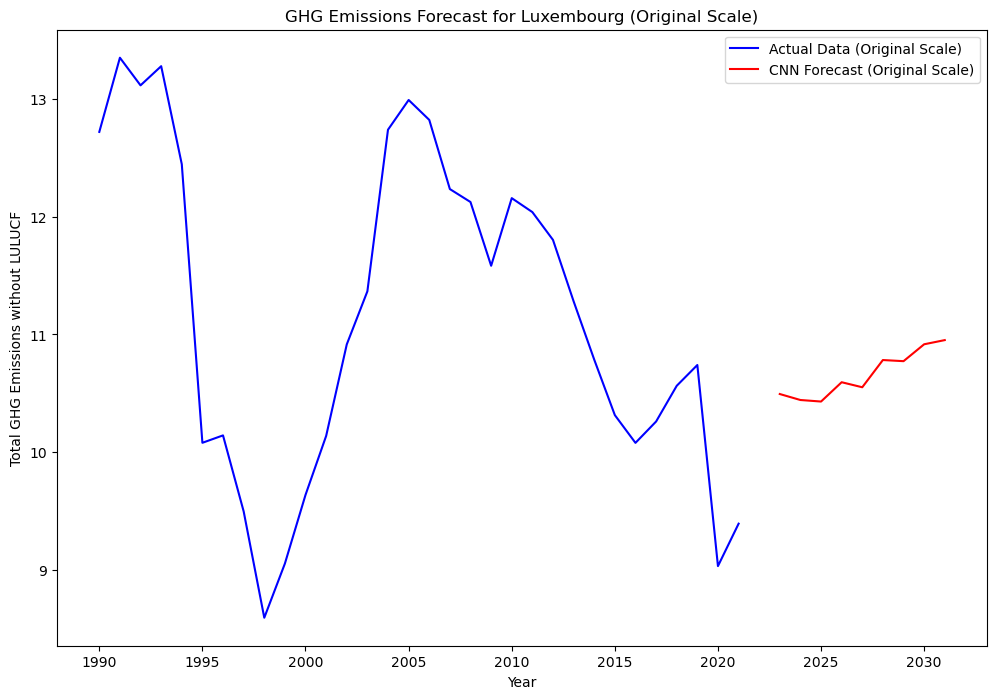

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for New Zealand (Fold 1):
MAE : 0.1821222290364446
MSE : 0.03379651411305914
RMSE : 0.18383828250138526
MAPE : 0.04175742304255059
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for New Zealand (Fold 2):
MAE : 0.203858899164727
MSE : 0.042590651690225266
RMSE : 0.20637502680853917
MAPE : 0.04680451432317819
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Metrics for New Zealand (Fold 3):
MAE : 0.22703911885040964
MSE : 0.051794511807570186
RMSE : 0.22758407634887418
MAPE : 0.05197470611740981
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Metrics for New Zealand (Fold 4):
MAE : 0.16714699487401083
MSE : 0.028083918795995977
RMSE : 0.16758257306771482
MAPE : 0.03836428698898913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for New Zealand (Fold 5):
MAE : 0.023174475710069586
MSE : 0.0008088748464813353
RMSE : 0.02844072513986476
MAPE : 0.00530731938930033
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
            CNN Forecast
2022-12-31      4.482655
2023-12-31      4.4

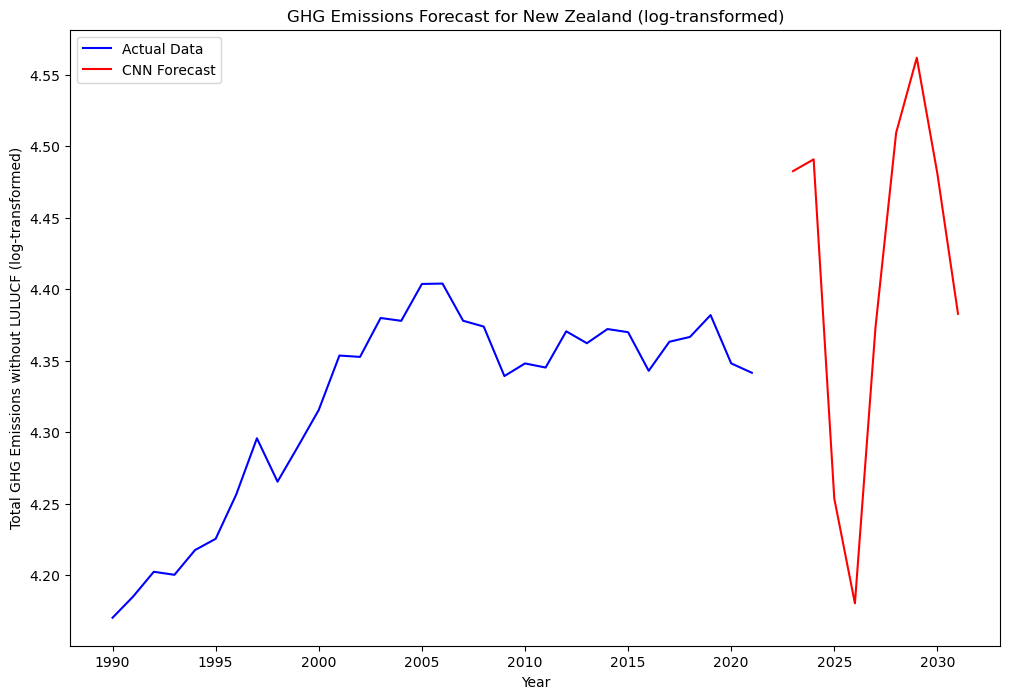

            CNN Forecast
2022-12-31     88.469254
2023-12-31     89.200966
2024-12-31     70.347084
2025-12-31     65.375160
2026-12-31     79.318863
2027-12-31     90.869690
2028-12-31     95.778687
2029-12-31     88.306694
2030-12-31     80.061523


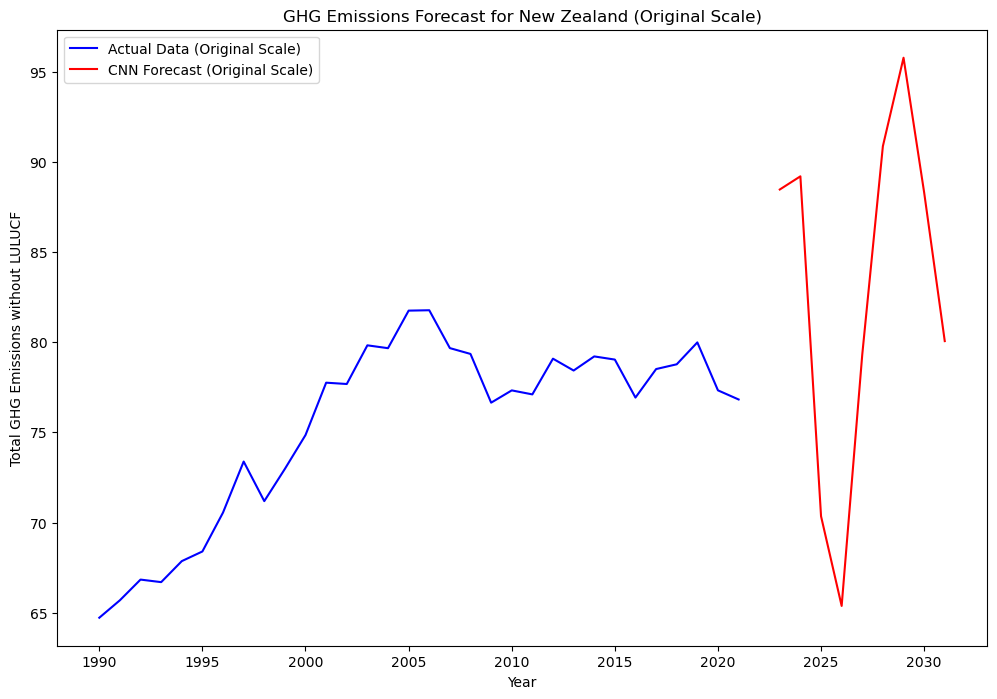

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Metrics for Norway (Fold 1):
MAE : 0.14325385110752795
MSE : 0.021566696244657475
RMSE : 0.14685603918347204
MAPE : 0.035881405564273196
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Norway (Fold 2):
MAE : 0.10876011617743304
MSE : 0.012395226070559576
RMSE : 0.11133384961708445
MAPE : 0.02727025425996668
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Metrics for Norway (Fold 3):
MAE : 0.1148128513712261
MSE : 0.01321142949738585
RMSE : 0.11494098267104666
MAPE : 0.02878741782450536
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Metrics for Norway (Fold 4):
MAE : 0.16120870947385071
MSE : 0.02666247146581739
RMSE : 0.16328647055349502
MAPE : 0.040625937153890006
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Metrics for Norway (Fold 5):
MAE : 0.20335541520821598
MSE : 0.04201107028623097
RMSE : 0.2049660222725488
MAPE : 0.05209697516094889
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
            CNN Forecast
2022-12-31      4.024779
2023-12-31      4.046413
2024-12-31      4.05

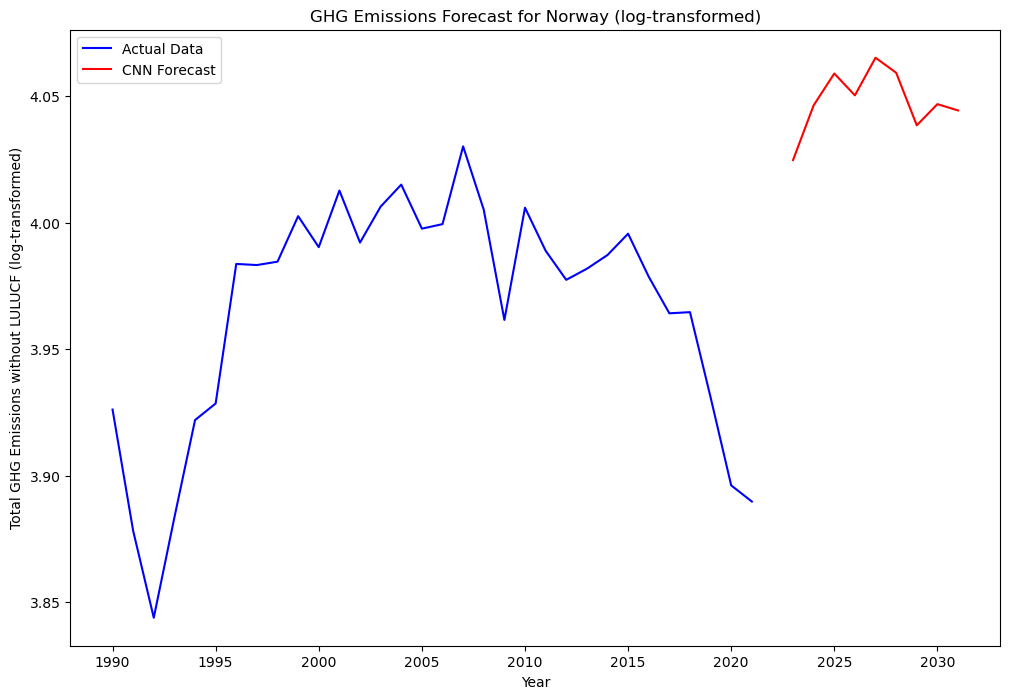

            CNN Forecast
2022-12-31     55.967957
2023-12-31     57.191967
2024-12-31     57.916592
2025-12-31     57.418411
2026-12-31     58.279057
2027-12-31     57.934792
2028-12-31     56.742725
2029-12-31     57.219677
2030-12-31     57.077404


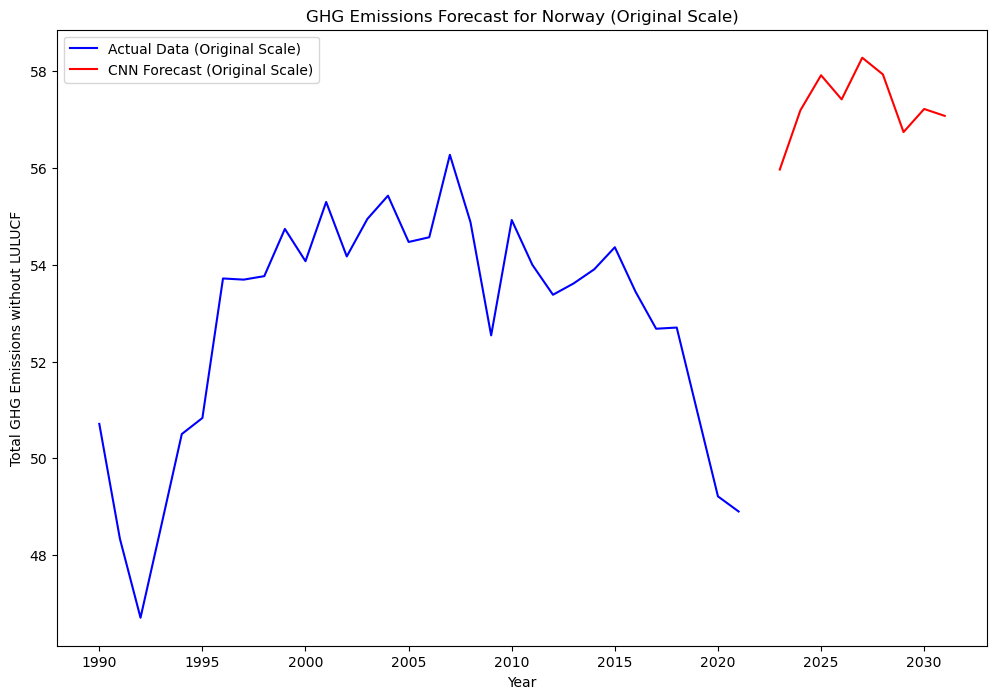

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Metrics for Poland (Fold 1):
MAE : 0.03277620763965198
MSE : 0.001092641312681908
RMSE : 0.03305512536176361
MAPE : 0.005463845488880671
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Metrics for Poland (Fold 2):
MAE : 0.06600289532545212
MSE : 0.0045322090969997396
RMSE : 0.06732168370591855
MAPE : 0.010997157505729077
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Metrics for Poland (Fold 3):
MAE : 0.05222629663068101
MSE : 0.003311212710576007
RMSE : 0.05754313782351469
MAPE : 0.008759099674274106
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Metrics for Poland (Fold 4):
MAE : 0.1617529772682985
MSE : 0.02632943147434656
RMSE : 0.16226346315281995
MAPE : 0.026946030997751554
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Metrics for Poland (Fold 5):
MAE : 0.024661889522399488
MSE : 0.0008214423099602548
RMSE : 0.028660814886535498
MAPE : 0.004152991724969123
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
            CNN Forecast
2022-12-31      5.901112
2023-12-31      5.925007
2024

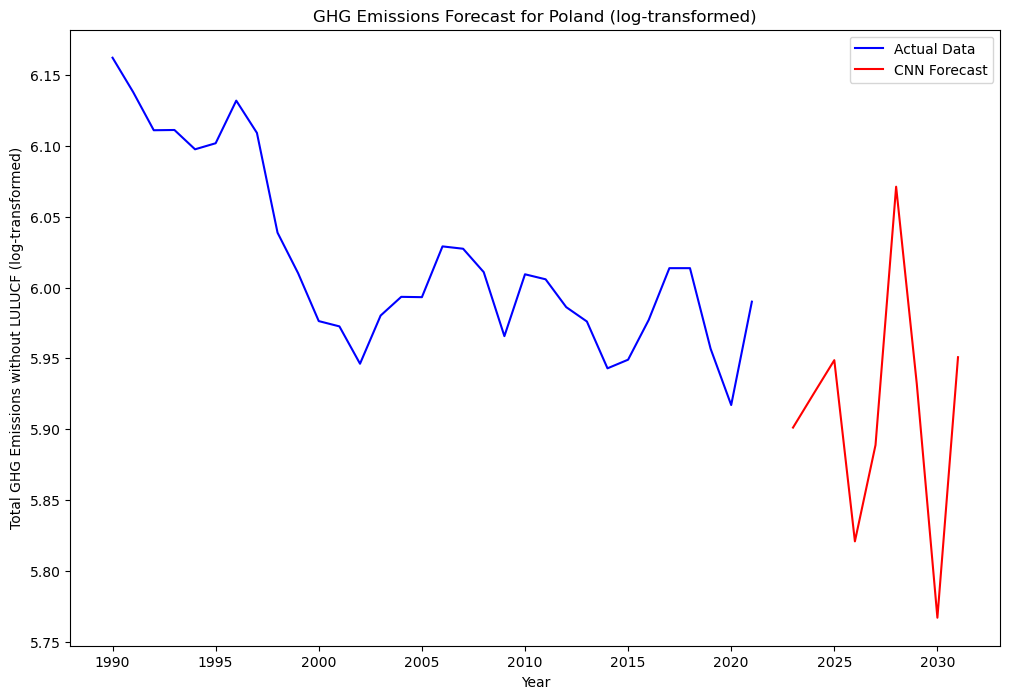

            CNN Forecast
2022-12-31    365.443451
2023-12-31    374.281189
2024-12-31    383.268646
2025-12-31    337.222382
2026-12-31    360.967621
2027-12-31    433.230560
2028-12-31    376.903870
2029-12-31    319.512726
2030-12-31    384.069427


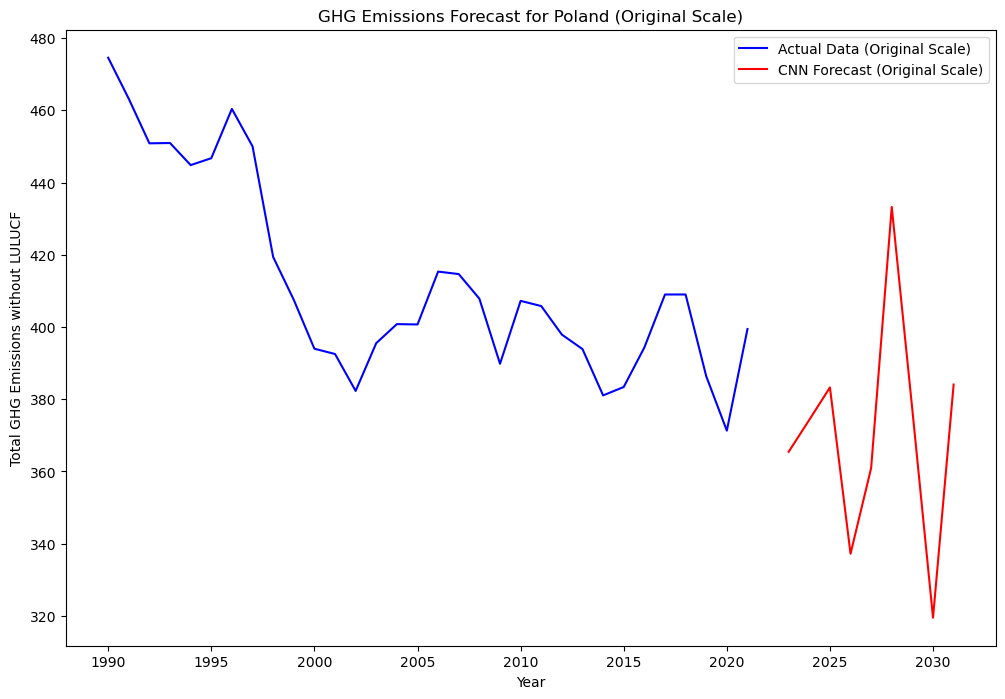

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Metrics for Portugal (Fold 1):
MAE : 0.21471148497325535
MSE : 0.055589393526666996
RMSE : 0.23577403064516456
MAPE : 0.049636501716259974
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Metrics for Portugal (Fold 2):
MAE : 0.4105732996656479
MSE : 0.169592142235677
RMSE : 0.41181566535972985
MAPE : 0.09738542005581512
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Metrics for Portugal (Fold 3):
MAE : 0.3239952438803
MSE : 0.10571478866527191
RMSE : 0.32513810706417035
MAPE : 0.07753598909315514
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Metrics for Portugal (Fold 4):
MAE : 0.2210439867597982
MSE : 0.05120125303605008
RMSE : 0.22627693880740493
MAPE : 0.052357702707586384
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Metrics for Portugal (Fold 5):
MAE : 0.1758080532846149
MSE : 0.0318555481388068
RMSE : 0.17848122629231009
MAPE : 0.04314099841365327
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
            CNN Forecast
2022-12-31      4.110861
2023-12-31      4.146421
2024-12-31   

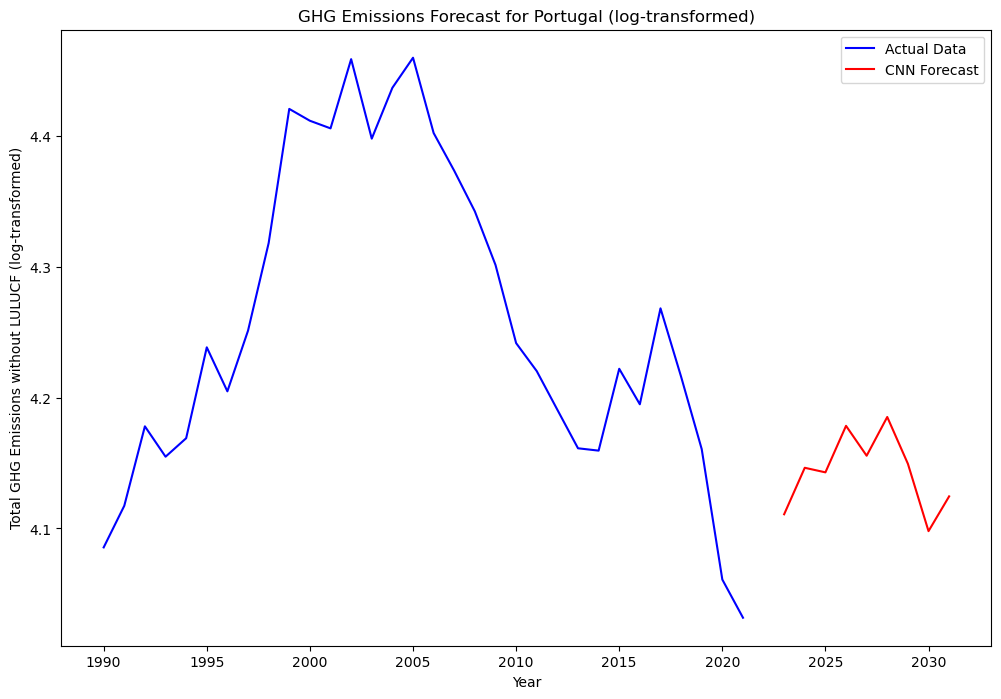

            CNN Forecast
2022-12-31     60.999207
2023-12-31     63.207378
2024-12-31     62.986477
2025-12-31     65.267731
2026-12-31     63.792480
2027-12-31     65.711662
2028-12-31     63.398865
2029-12-31     60.217690
2030-12-31     61.840439


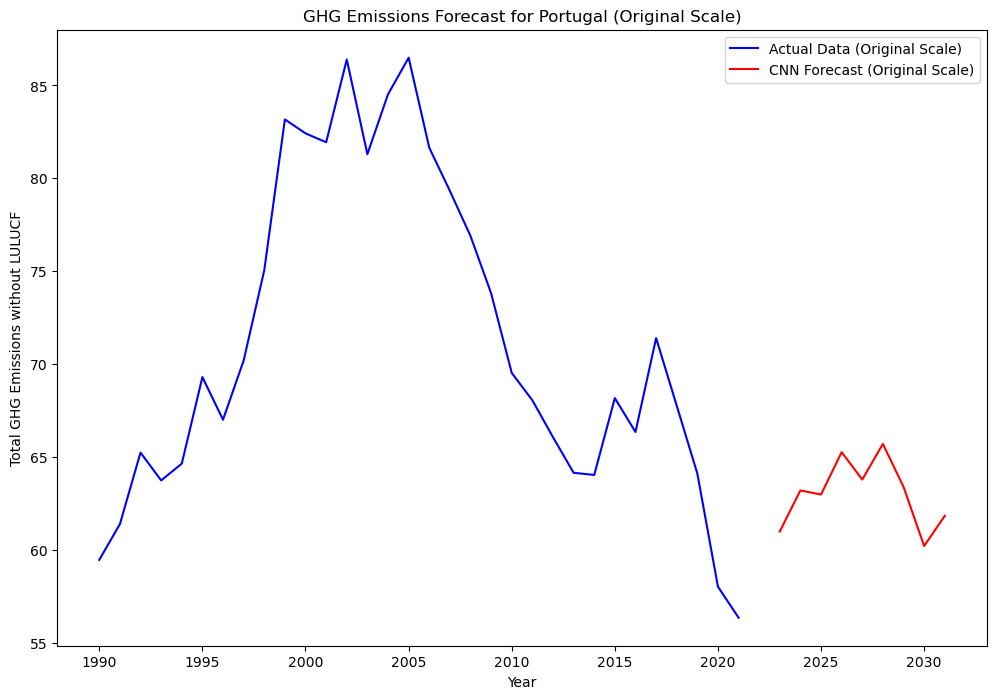

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Metrics for Romania (Fold 1):
MAE : 0.06141806294170079
MSE : 0.005567892256479241
RMSE : 0.07461831046384822
MAPE : 0.012190011966252766
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Metrics for Romania (Fold 2):
MAE : 0.12772043195930247
MSE : 0.020075800509434086
RMSE : 0.14168909806133317
MAPE : 0.026188078109400593
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Metrics for Romania (Fold 3):
MAE : 0.007861049197361266
MSE : 0.00010131049223655661
RMSE : 0.010065311333314862
MAPE : 0.001646362791354201
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Metrics for Romania (Fold 4):
MAE : 0.24139854205068487
MSE : 0.058292167919734184
RMSE : 0.2414377102271602
MAPE : 0.05063446287951822
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Metrics for Romania (Fold 5):
MAE : 0.05040937382472658
MSE : 0.004701791169815295
RMSE : 0.06856960820812158
MAPE : 0.01061791509681139
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
            CNN Forecast
2022-12-31      4.618379
2023-12-31      4.625481


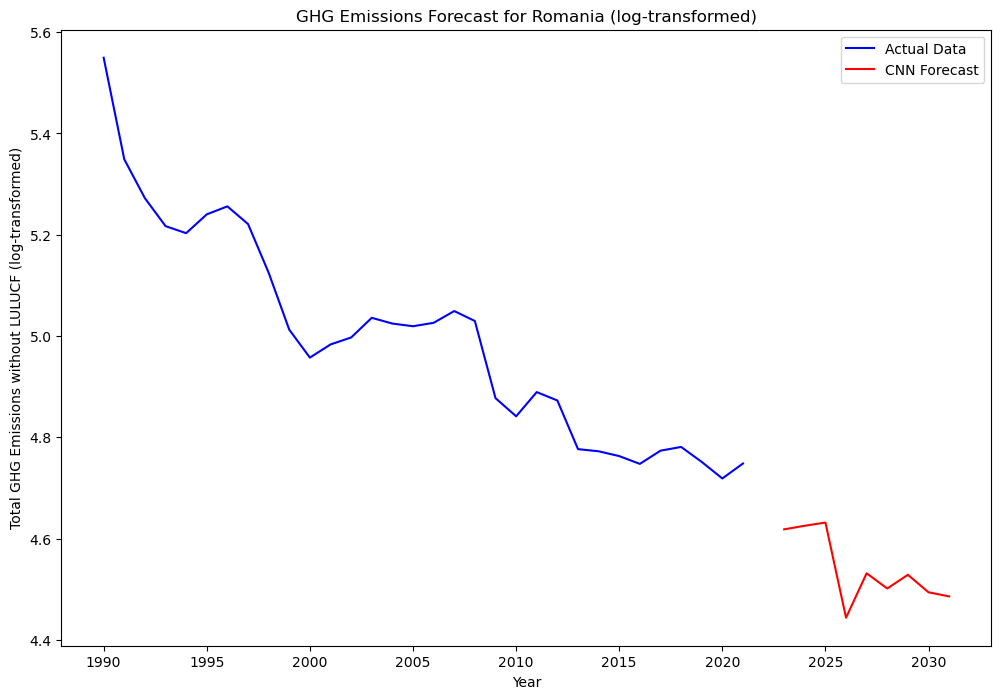

            CNN Forecast
2022-12-31    101.329605
2023-12-31    102.051857
2024-12-31    102.698128
2025-12-31     85.104675
2026-12-31     92.911827
2027-12-31     90.159622
2028-12-31     92.633438
2029-12-31     89.486877
2030-12-31     88.765678


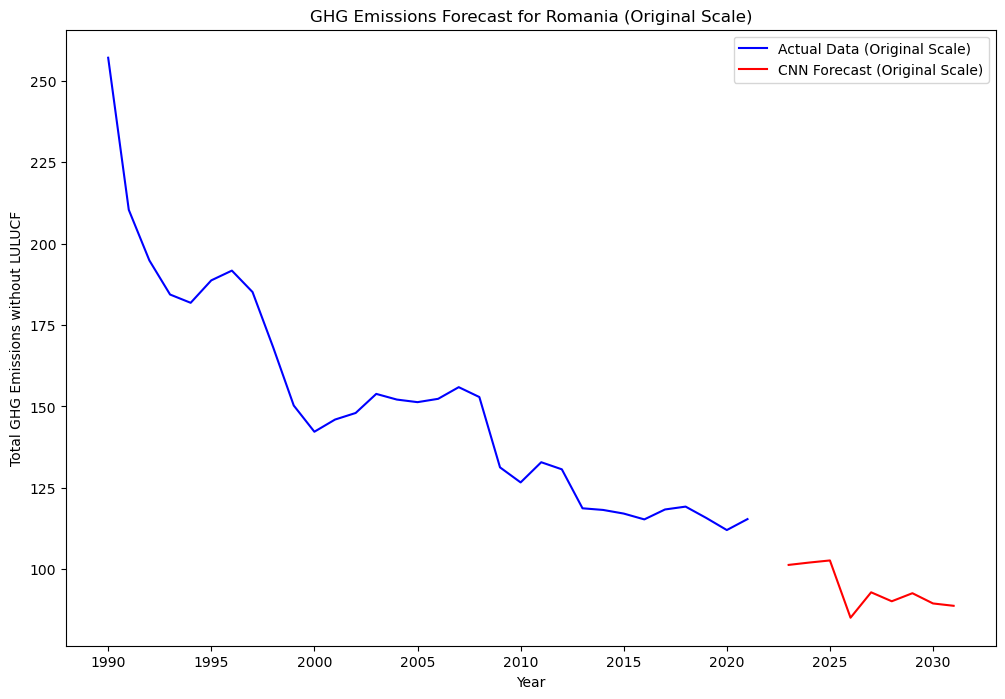

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Metrics for Russian Federation (Fold 1):
MAE : 0.2565006584990967
MSE : 0.06636874844677088
RMSE : 0.25762132762403595
MAPE : 0.03373247745268403
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Metrics for Russian Federation (Fold 2):
MAE : 0.144778416509876
MSE : 0.02113869864932791
RMSE : 0.14539153568666888
MAPE : 0.01896380543778256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Metrics for Russian Federation (Fold 3):
MAE : 0.3900279381936815
MSE : 0.15217027471816427
RMSE : 0.3900900853881886
MAPE : 0.05118776701891689
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Metrics for Russian Federation (Fold 4):
MAE : 0.06562559736447504
MSE : 0.00448439363500066
RMSE : 0.06696561531861453
MAPE : 0.008581077034406791
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Metrics for Russian Federation (Fold 5):
MAE : 0.07711462975690697
MSE : 0.006149612790662308
RMSE : 0.07841946691136269
MAPE : 0.01006515871722268
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
            CNN Forecast
2022-12-3

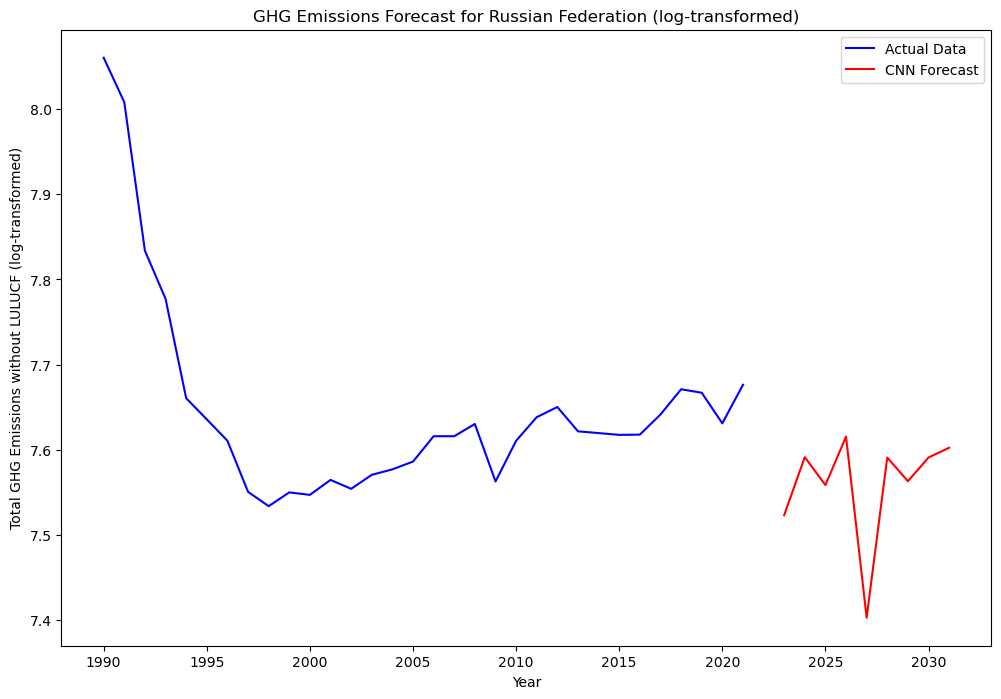

            CNN Forecast
2022-12-31   1850.244751
2023-12-31   1980.870972
2024-12-31   1916.987671
2025-12-31   2029.193359
2026-12-31   1640.373779
2027-12-31   1979.851074
2028-12-31   1925.607666
2029-12-31   1980.016357
2030-12-31   2002.814697


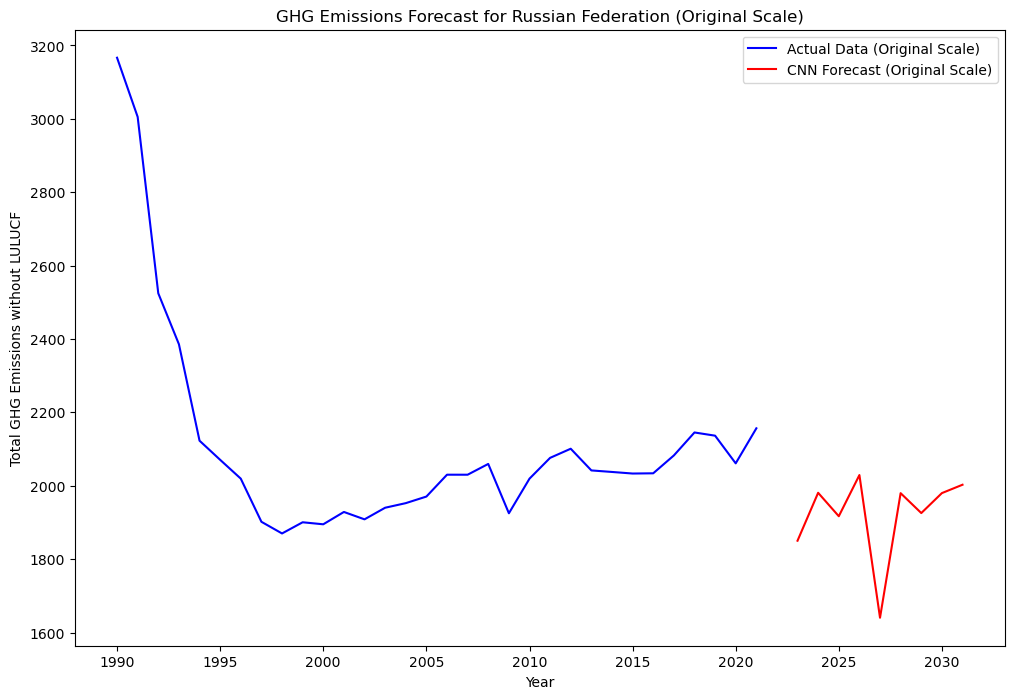

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Metrics for Slovakia (Fold 1):
MAE : 0.0980859381938138
MSE : 0.010884131448091616
RMSE : 0.10432704082878809
MAPE : 0.02530070523141271
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Metrics for Slovakia (Fold 2):
MAE : 0.03780929084529546
MSE : 0.0016371935531698312
RMSE : 0.040462248493748236
MAPE : 0.009940903960232032
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Metrics for Slovakia (Fold 3):
MAE : 0.08473679835082241
MSE : 0.007349913423261624
RMSE : 0.08573163607013239
MAPE : 0.02283128753204018
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Metrics for Slovakia (Fold 4):
MAE : 0.1249234826879236
MSE : 0.016265458408345267
RMSE : 0.1275361062928662
MAPE : 0.033404590423571495
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Metrics for Slovakia (Fold 5):
MAE : 0.04928915016692237
MSE : 0.003956179419210482
RMSE : 0.06289816705763755
MAPE : 0.01334859966996343
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
            CNN Forecast
2022-12-31      3.528514
2023-12-31      3.574393


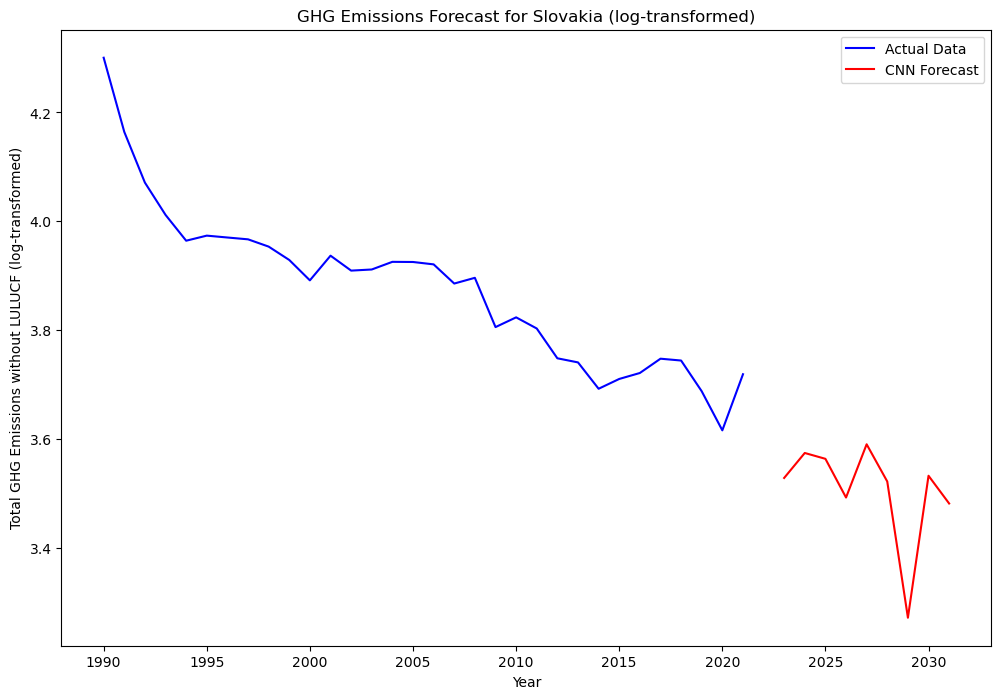

            CNN Forecast
2022-12-31     34.073303
2023-12-31     35.672962
2024-12-31     35.292000
2025-12-31     32.869747
2026-12-31     36.247700
2027-12-31     33.853138
2028-12-31     26.357309
2029-12-31     34.211548
2030-12-31     32.511772


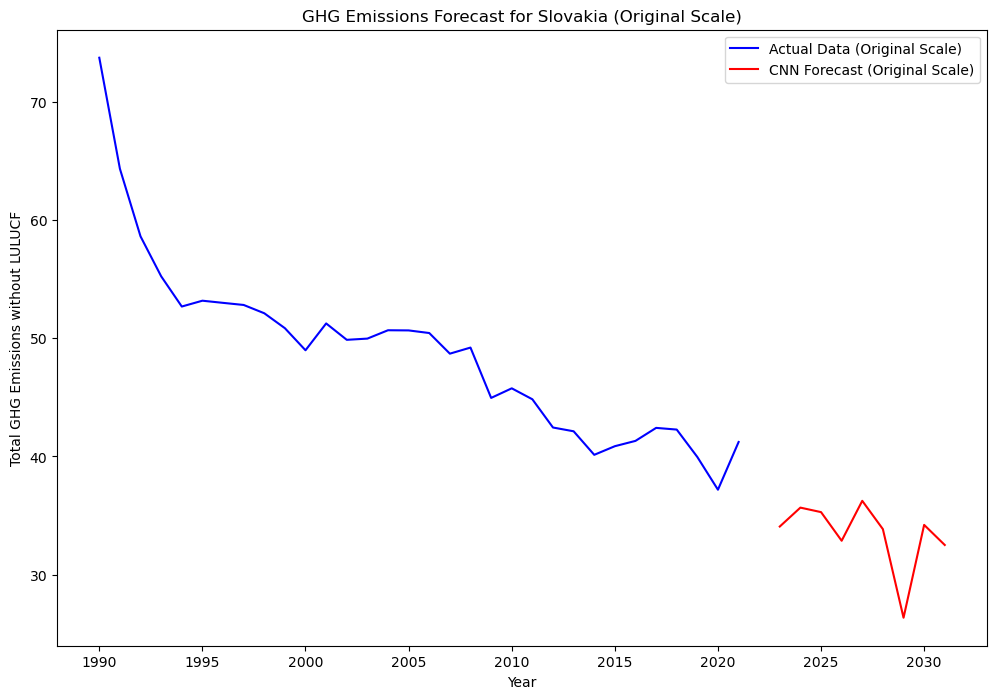

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Metrics for Spain (Fold 1):
MAE : 0.11824470254793902
MSE : 0.024013439400178017
RMSE : 0.1549627032552608
MAPE : 0.01989187502443486
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Metrics for Spain (Fold 2):
MAE : 0.34856135906462793
MSE : 0.12269830384963627
RMSE : 0.3502831766580237
MAPE : 0.0594470121797244
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Metrics for Spain (Fold 3):
MAE : 0.4615336954389078
MSE : 0.213267099214546
RMSE : 0.4618085092487426
MAPE : 0.07977916201315806
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Metrics for Spain (Fold 4):
MAE : 0.38782893997645296
MSE : 0.15071075609638507
RMSE : 0.3882148324013201
MAPE : 0.06694337290493119
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Metrics for Spain (Fold 5):
MAE : 0.27404019245103495
MSE : 0.07902236412566137
RMSE : 0.2811091676300532
MAPE : 0.04835730520024909
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
            CNN Forecast
2022-12-31      5.815065
2023-12-31      5.856324
2024-12-31      5.746851
2025

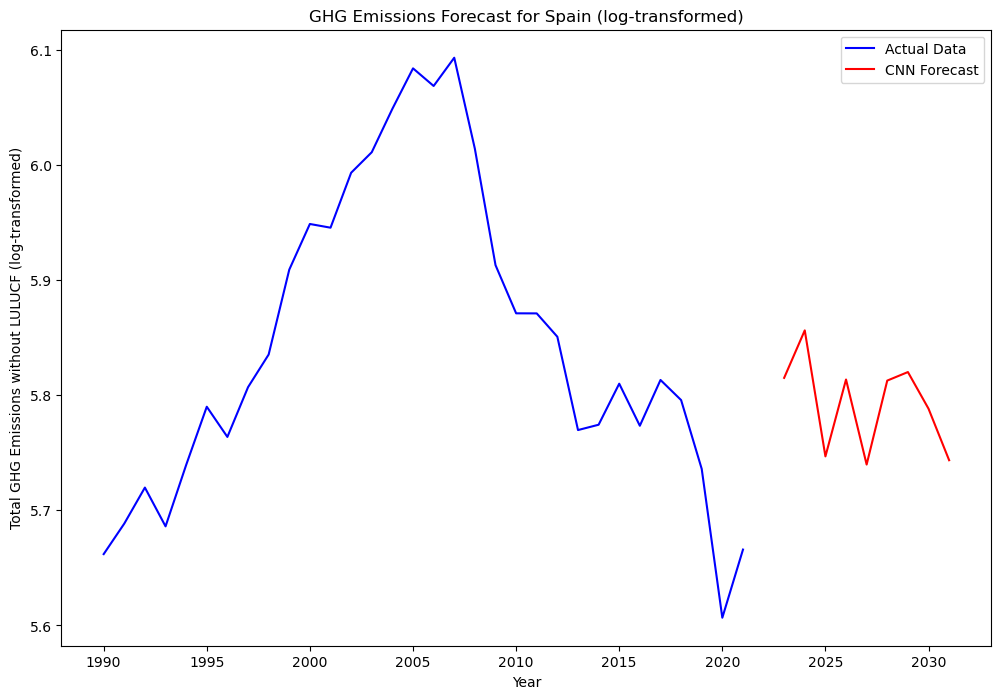

            CNN Forecast
2022-12-31    335.313324
2023-12-31    349.437317
2024-12-31    313.202972
2025-12-31    334.836243
2026-12-31    310.991516
2027-12-31    334.521698
2028-12-31    337.013245
2029-12-31    326.452148
2030-12-31    312.160919


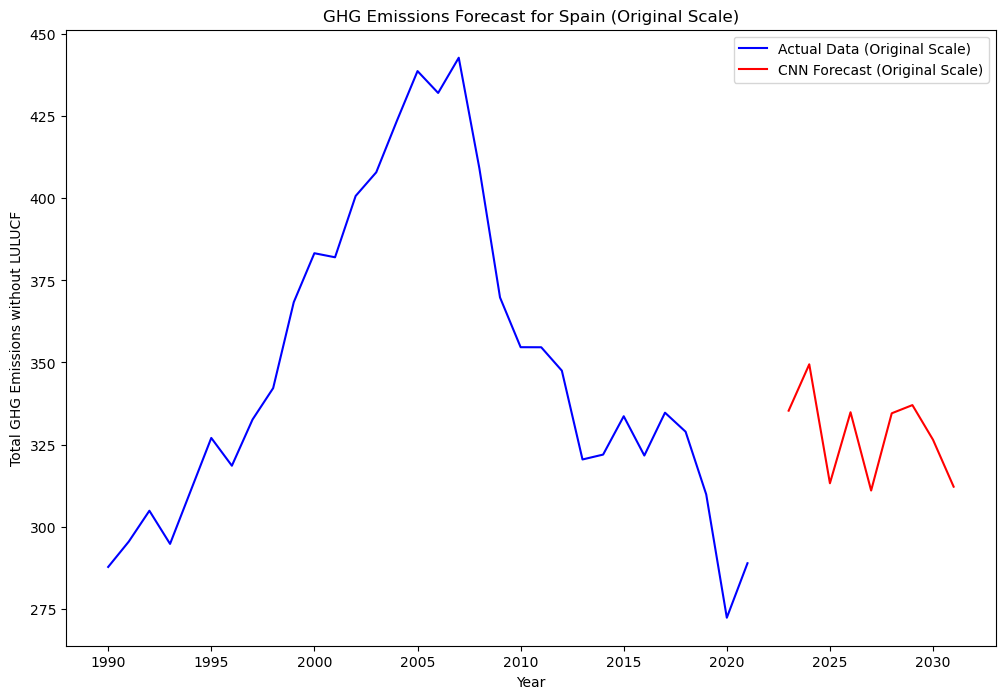

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Metrics for Sweden (Fold 1):
MAE : 0.14553976998789717
MSE : 0.021522699480253125
RMSE : 0.14670616715139526
MAPE : 0.03531952909699109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Metrics for Sweden (Fold 2):
MAE : 0.03554852026778862
MSE : 0.0017772611610699575
RMSE : 0.04215757536991374
MAPE : 0.00871601704979812
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Metrics for Sweden (Fold 3):
MAE : 0.08951218032254893
MSE : 0.008266467825976273
RMSE : 0.09092011782865371
MAPE : 0.02242984449521186
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Metrics for Sweden (Fold 4):
MAE : 0.08255477153246504
MSE : 0.006839310420018788
RMSE : 0.0827001234583044
MAPE : 0.020830910564400923
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Metrics for Sweden (Fold 5):
MAE : 0.11554104896001209
MSE : 0.014421132637192307
RMSE : 0.12008802037335908
MAPE : 0.029899887964092913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
            CNN Forecast
2022-12-31      3.839638
2023-12-31      3.855742
2024-12-3

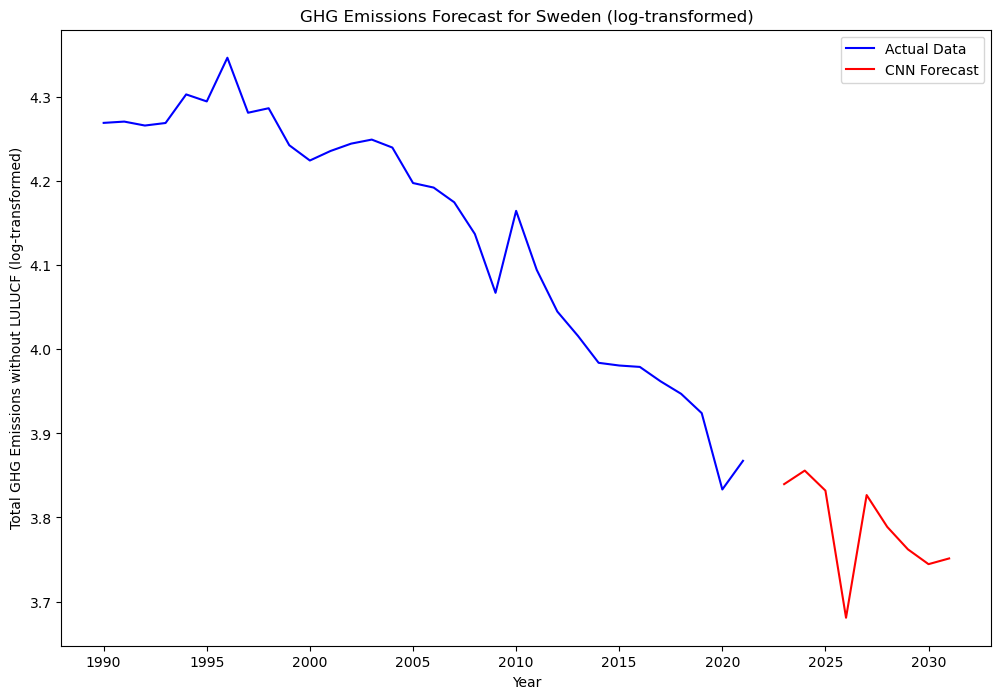

            CNN Forecast
2022-12-31     46.508652
2023-12-31     47.263649
2024-12-31     46.152058
2025-12-31     39.674896
2026-12-31     45.907379
2027-12-31     44.202110
2028-12-31     43.037376
2029-12-31     42.285393
2030-12-31     42.573799


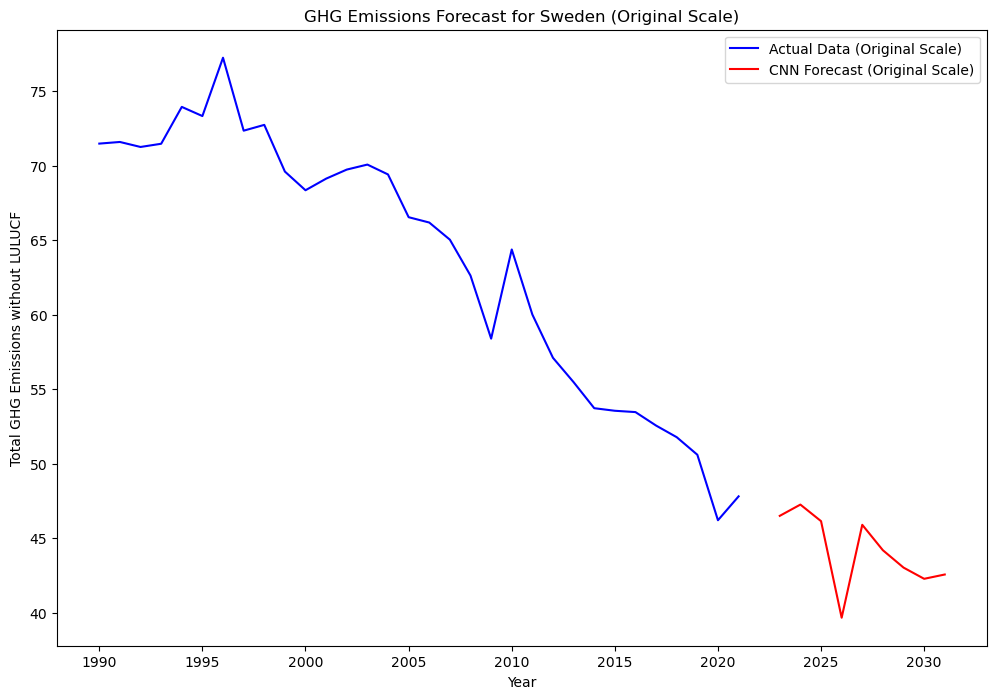

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Metrics for Switzerland (Fold 1):
MAE : 0.08269366235253377
MSE : 0.007127149544150714
RMSE : 0.08442244692112824
MAPE : 0.02071904654919325
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Metrics for Switzerland (Fold 2):
MAE : 0.06431362744416728
MSE : 0.005016567540579105
RMSE : 0.07082773143747514
MAPE : 0.01626210314955813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Metrics for Switzerland (Fold 3):
MAE : 0.059305019850326435
MSE : 0.004967480984513553
RMSE : 0.07048035885630516
MAPE : 0.015215984273540059
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Metrics for Switzerland (Fold 4):
MAE : 0.12042133465792586
MSE : 0.014641346790739335
RMSE : 0.1210014330110984
MAPE : 0.031114460442082537
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Metrics for Switzerland (Fold 5):
MAE : 0.16837875033845714
MSE : 0.028994936298653563
RMSE : 0.17027899547111958
MAPE : 0.04424626280871007
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
            CNN Forecast
2022-12-31      3.808653
2023-12-3

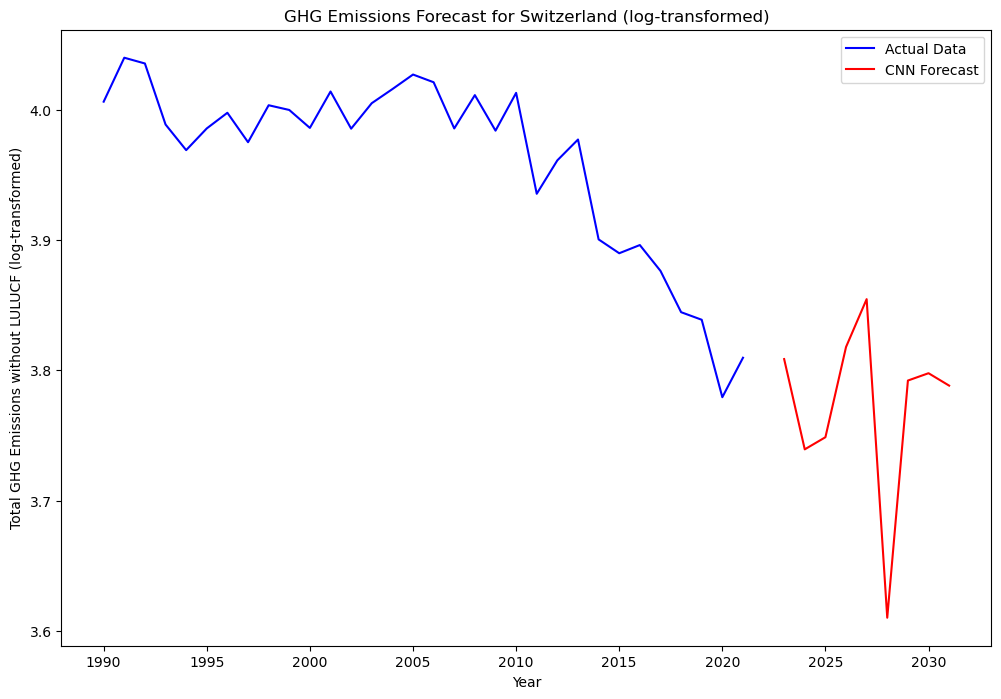

            CNN Forecast
2022-12-31     45.089676
2023-12-31     42.072506
2024-12-31     42.465866
2025-12-31     45.509525
2026-12-31     47.211208
2027-12-31     36.974007
2028-12-31     44.353146
2029-12-31     44.603348
2030-12-31     44.180641


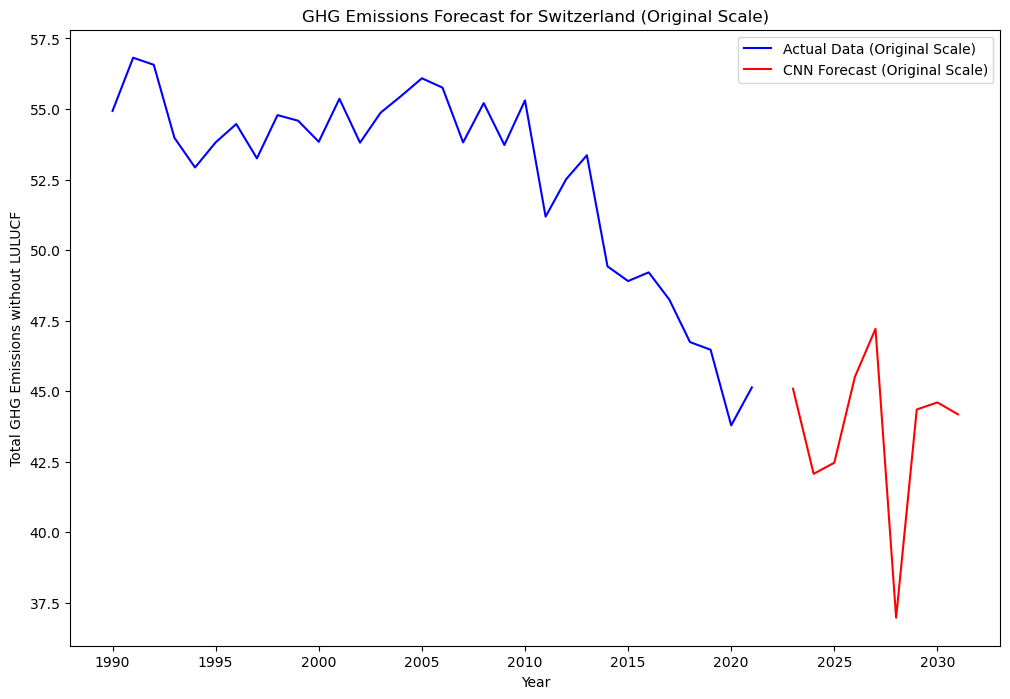

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Metrics for Türkiye (Fold 1):
MAE : 0.021402665239647806
MSE : 0.0006182001594748269
RMSE : 0.024863631260836114
MAPE : 0.003586075796612123
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Metrics for Türkiye (Fold 2):
MAE : 0.049207512068225455
MSE : 0.004201778478666977
RMSE : 0.06482112679263588
MAPE : 0.008078076402877315
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Metrics for Türkiye (Fold 3):
MAE : 0.011167060156238584
MSE : 0.00015356152027675522
RMSE : 0.012391994200965203
MAPE : 0.0018215146343881713
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Metrics for Türkiye (Fold 4):
MAE : 0.08676562214622525
MSE : 0.01005925754000913
RMSE : 0.10029585006374456
MAPE : 0.013867396678647717
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Metrics for Türkiye (Fold 5):
MAE : 0.13233605149733188
MSE : 0.018568841611240818
RMSE : 0.13626753689430515
MAPE : 0.02112164717549155
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
            CNN Forecast
2022-12-31      6.371787
2023-12-31      6.3

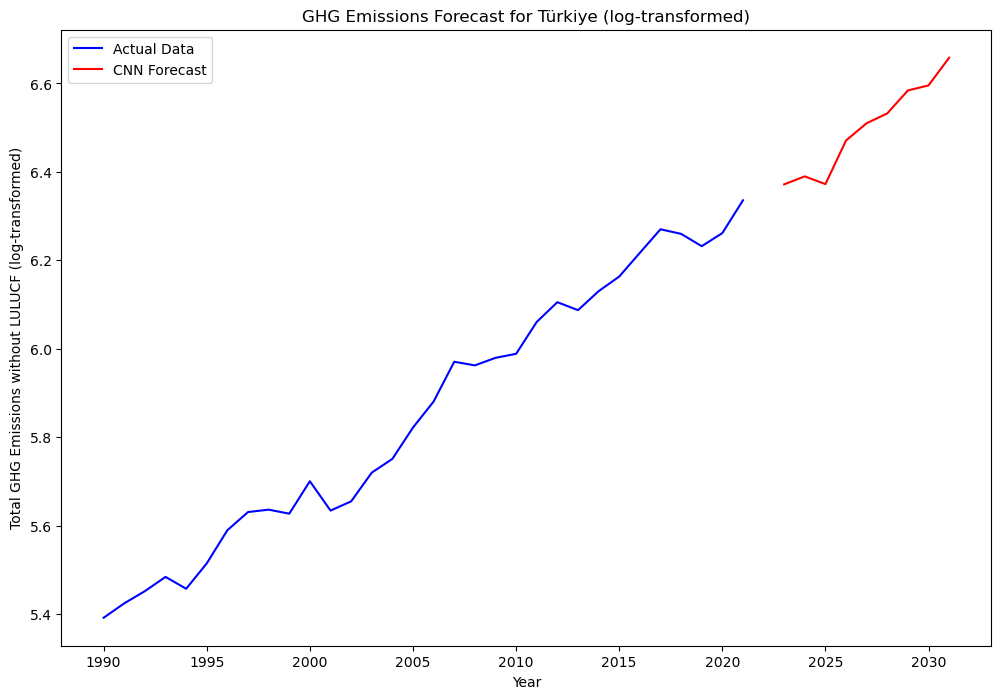

            CNN Forecast
2022-12-31    585.102234
2023-12-31    595.745483
2024-12-31    585.411438
2025-12-31    646.135559
2026-12-31    671.862427
2027-12-31    686.915833
2028-12-31    723.579834
2029-12-31    731.827087
2030-12-31    779.161133


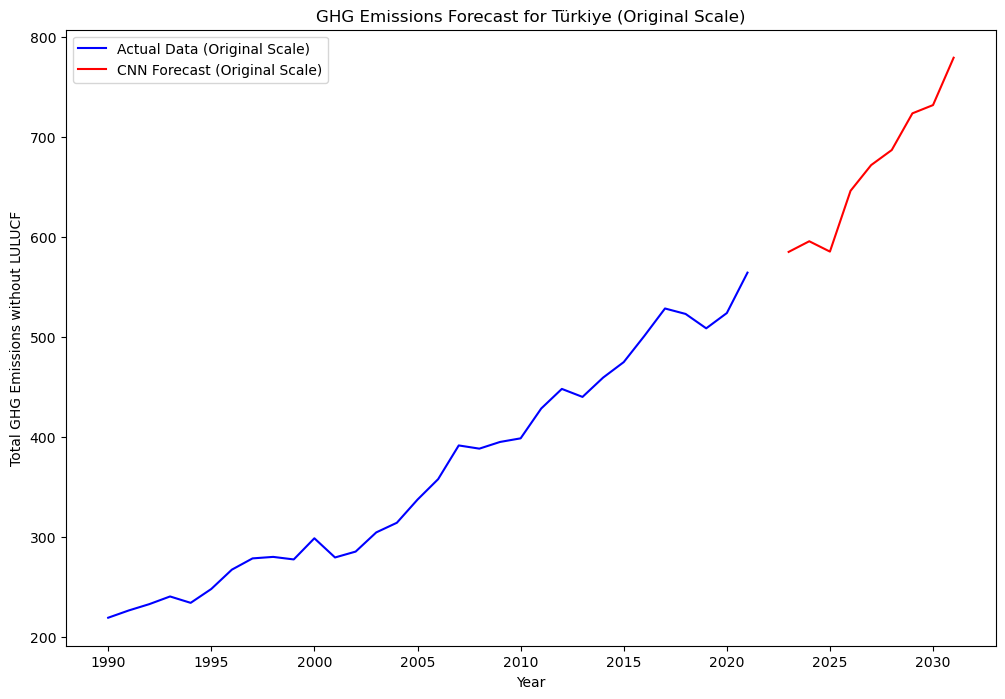

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Metrics for Ukraine (Fold 1):
MAE : 0.3228878370289099
MSE : 0.10637750051939072
RMSE : 0.3261556384908756
MAPE : 0.05309357762502611
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Metrics for Ukraine (Fold 2):
MAE : 0.3226253947354453
MSE : 0.10685110952009318
RMSE : 0.32688087971016777
MAPE : 0.05343120174008486
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Metrics for Ukraine (Fold 3):
MAE : 0.13300463119911102
MSE : 0.02794183100667626
RMSE : 0.1671581018278093
MAPE : 0.02228693820933599
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Metrics for Ukraine (Fold 4):
MAE : 0.24200158981937214
MSE : 0.05930801043388115
RMSE : 0.2435323601369665
MAPE : 0.04163837089858801
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Metrics for Ukraine (Fold 5):
MAE : 0.05643572769828609
MSE : 0.003878964926521142
RMSE : 0.06228133690377192
MAPE : 0.009755571822095846
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
            CNN Forecast
2022-12-31      5.570934
2023-12-31      5.552033
2024-12-31    

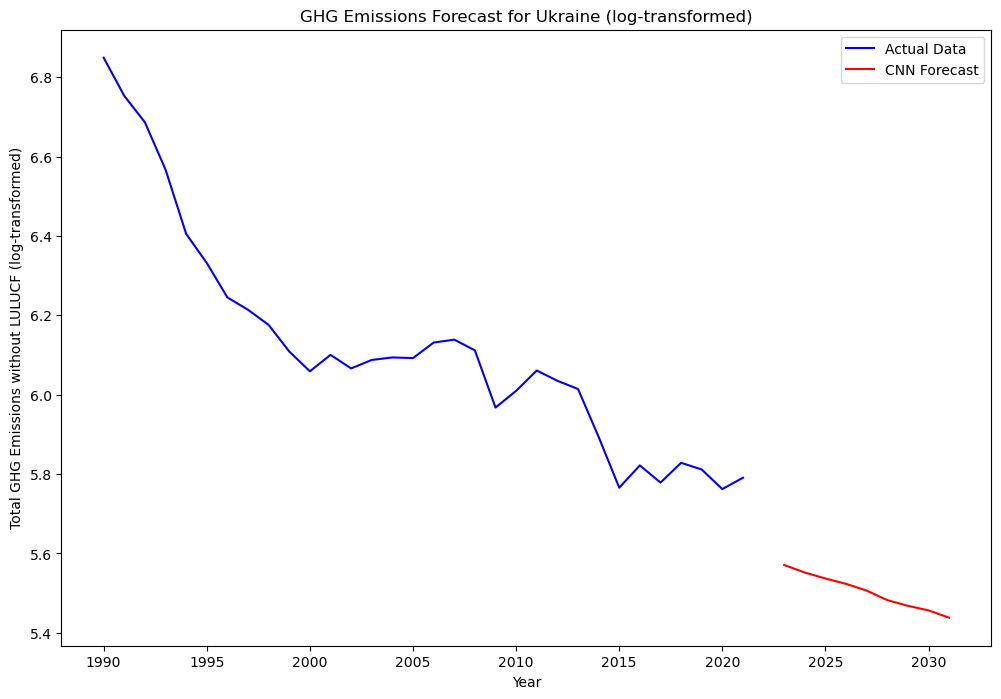

            CNN Forecast
2022-12-31    262.679413
2023-12-31    257.761017
2024-12-31    253.898788
2025-12-31    250.485809
2026-12-31    246.295410
2027-12-31    240.437790
2028-12-31    237.007645
2029-12-31    234.292023
2030-12-31    230.007141


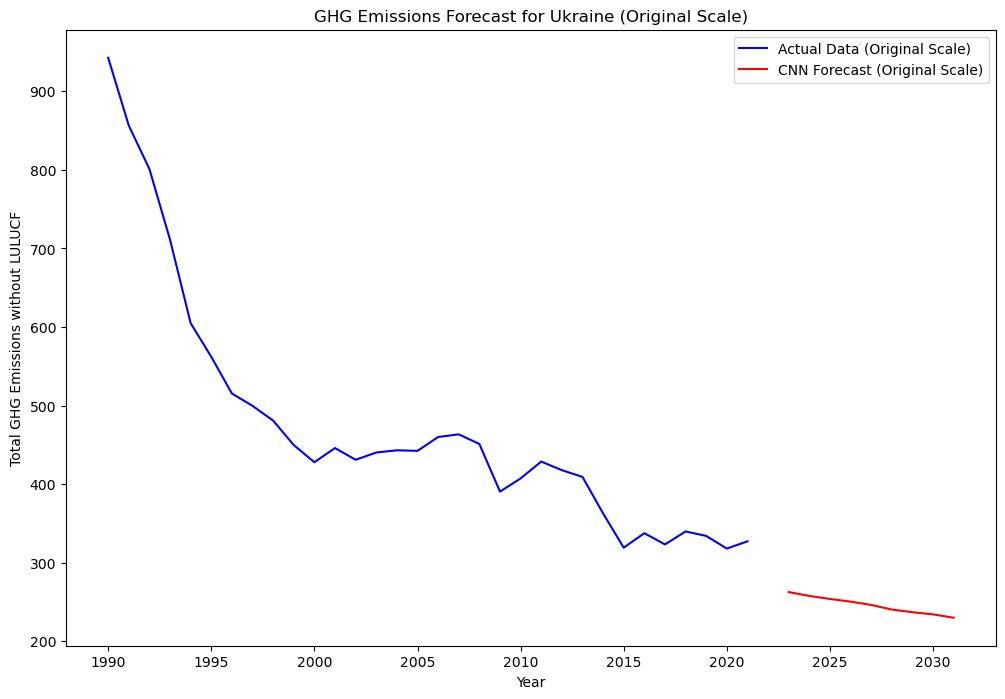

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Metrics for United Kingdom of Great Britain and Northern Ireland (Fold 1):
MAE : 0.03263272766709413
MSE : 0.0018647532694948995
RMSE : 0.043182789042567636
MAPE : 0.005074018730400272
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Metrics for United Kingdom of Great Britain and Northern Ireland (Fold 2):
MAE : 0.1612442473793528
MSE : 0.02739133576560406
RMSE : 0.16550328022611532
MAPE : 0.02529928831635053
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Metrics for United Kingdom of Great Britain and Northern Ireland (Fold 3):
MAE : 0.1824816592478585
MSE : 0.0350888243325626
RMSE : 0.187320111927584
MAPE : 0.02906557084418467
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Metrics for United Kingdom of Great Britain and Northern Ireland (Fold 4):
MAE : 0.2848890092277143
MSE : 0.0812535786633038
RMSE : 0.28505013359636194
MAPE : 0.046186924533520385
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Metrics for United Kingdom of Great Britain and Northern Ireland (Fold 5):
MAE : 0.

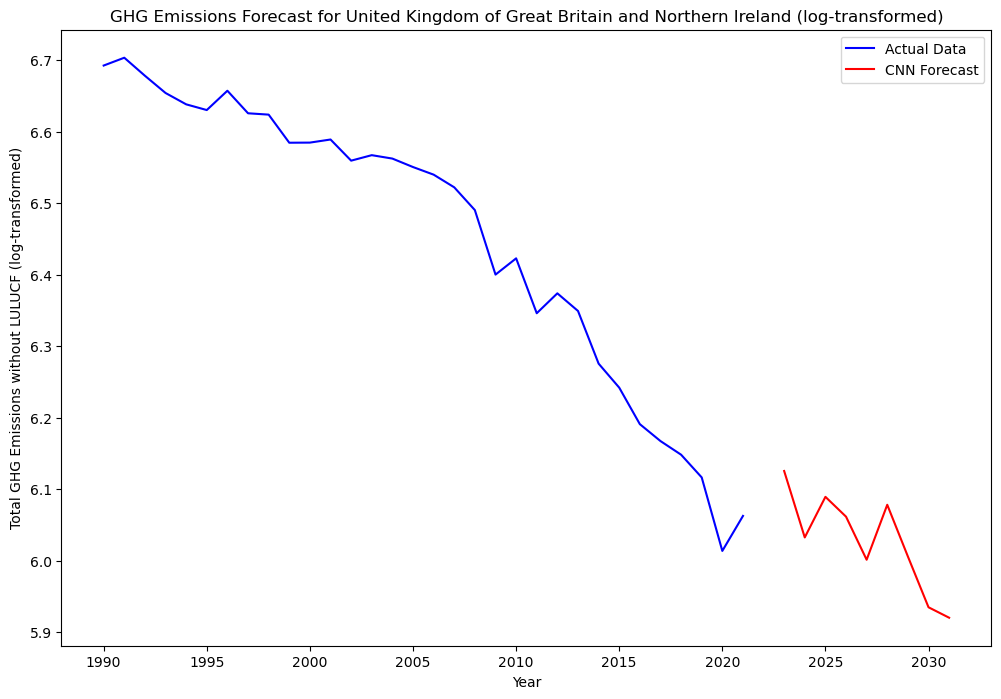

            CNN Forecast
2022-12-31    457.342468
2023-12-31    416.753906
2024-12-31    441.103516
2025-12-31    429.036713
2026-12-31    403.950653
2027-12-31    436.231506
2028-12-31    405.766815
2029-12-31    377.970917
2030-12-31    372.489502


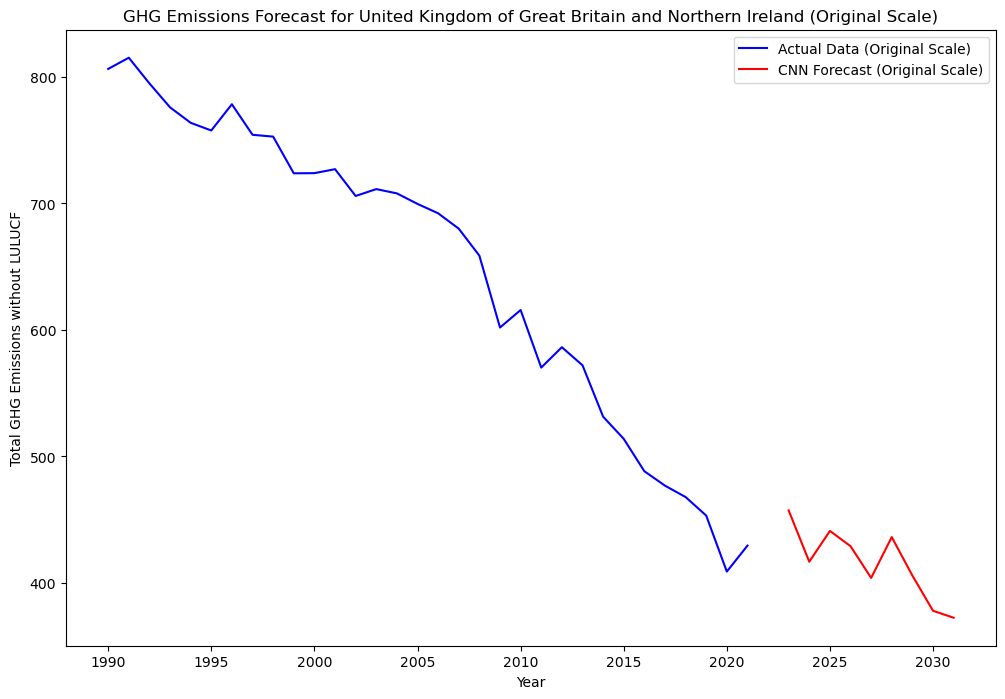

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
Metrics for United States of America (Fold 1):
MAE : 0.09222309808781819
MSE : 0.010626483770122657
RMSE : 0.10308483773146591
MAPE : 0.010404726014505527
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
Metrics for United States of America (Fold 2):
MAE : 0.14649890821973402
MSE : 0.022100569320692428
RMSE : 0.14866260229355743
MAPE : 0.01658756394232538
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Metrics for United States of America (Fold 3):
MAE : 0.14958933937663232
MSE : 0.022650700246725556
RMSE : 0.15050149582886396
MAPE : 0.016945928826696443
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
Metrics for United States of America (Fold 4):
MAE : 0.15061381632377055
MSE : 0.022886800834124078
RMSE : 0.15128384194660074
MAPE : 0.017118555927150527
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Metrics for United States of America (Fold 5):
MAE : 0.4197609388589563
MSE : 0.17692280533081117
RMSE : 0.42062192683074806
MAPE : 0.04795201387860493
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/

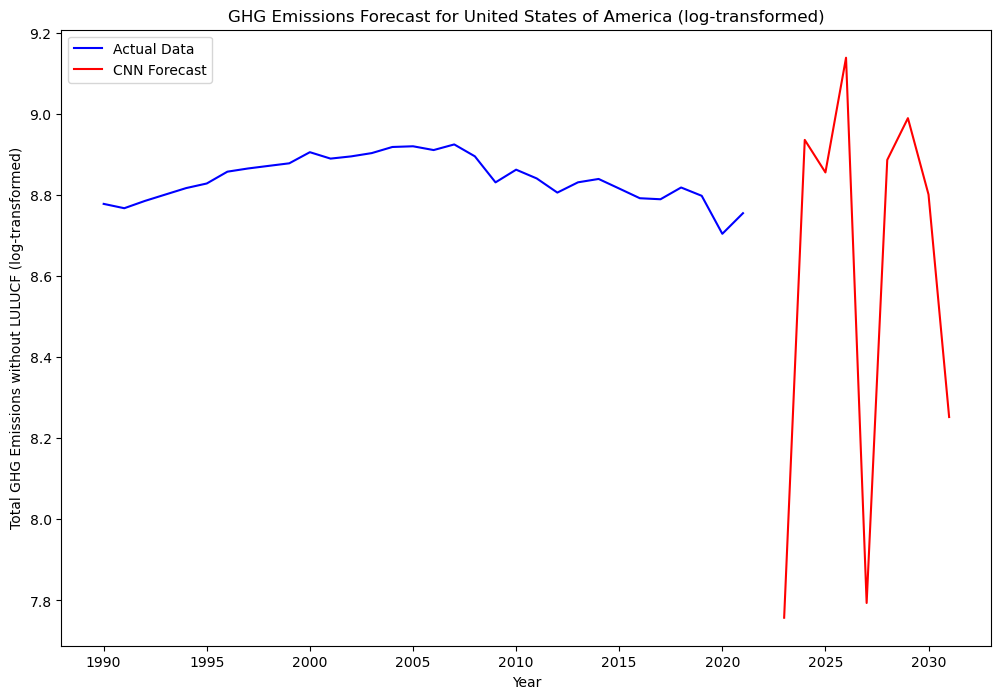

            CNN Forecast
2022-12-31   2338.685303
2023-12-31   7595.942383
2024-12-31   7010.394531
2025-12-31   9301.739258
2026-12-31   2425.273682
2027-12-31   7230.135742
2028-12-31   8014.058594
2029-12-31   6638.751465
2030-12-31   3835.595215


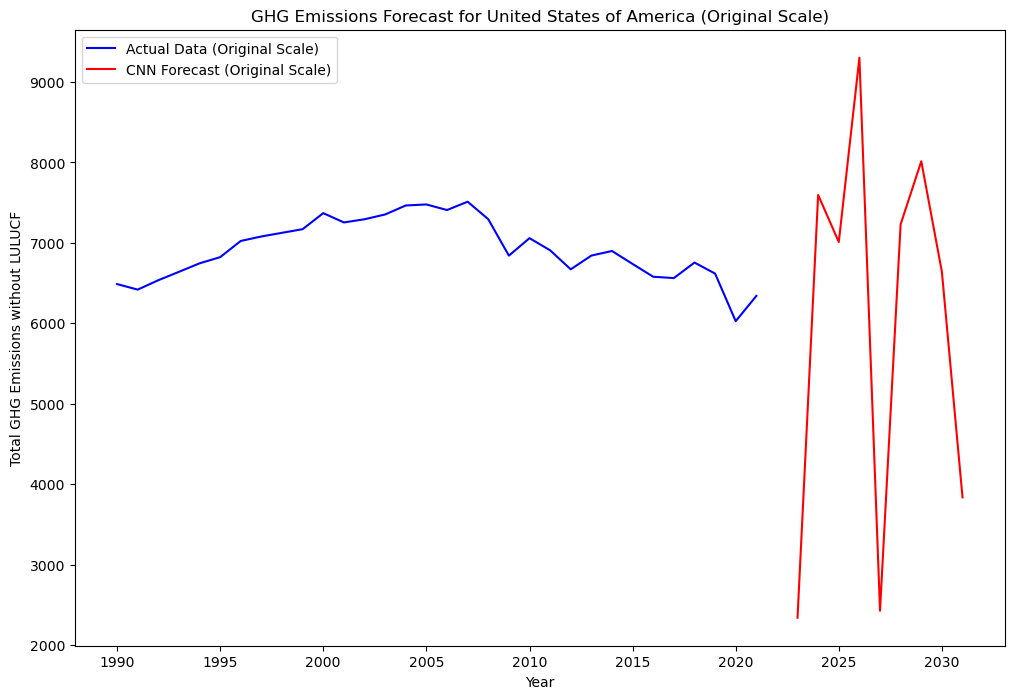

In [9]:
all_results = pd.DataFrame()

for country in emissions_log['Country'].unique():
    country_data = select_country(emissions_log, country, features, target)
    
    X = country_data[features].values
    y = country_data[target].values

    X_seq, y_seq = split_sequence(X, y, n_in, n_out)

    n_features = X_seq.shape[2]
    
    tscv = TimeSeriesSplit(n_splits=5)
    
    for fold, (train_index, test_index) in enumerate(tscv.split(X_seq)):
        X_train, X_test = X_seq[train_index], X_seq[test_index]
        y_train, y_test = y_seq[train_index], y_seq[test_index]

        model = build_and_train_model(X_train, y_train, n_in, n_features, n_out, epochs=epochs, learning_rate=learning_rate)

        yhat = model.predict(X_test)
        
        yhat = yhat[:, -1]
        y_test = y_test[:, -1]

        print(f"Metrics for {country} (Fold {fold + 1}):")
        metric(yhat, y_test)
    
    input_seq = X[-n_in:].reshape((1, n_in, n_features))
    forecast = model.predict(input_seq)[0]

    num_periods = n_out
    Year = pd.date_range(start=str(start_year), periods=num_periods, freq='A')
    CNN_fcast_df = pd.DataFrame(forecast, index=Year[:num_periods], columns=['CNN Forecast'])
   
    country_data_original_scale = np.exp(country_data)
    CNN_fcast_original_scale = np.exp(forecast)
    CNN_fcast_df_original_scale = pd.DataFrame(CNN_fcast_original_scale, index=Year, columns=['CNN Forecast'])
    

    print(CNN_fcast_df)
    plt.figure(figsize=(12, 8))
    plt.plot(country_data.index, y, label='Actual Data', color='blue')
    plt.plot(CNN_fcast_df, label='CNN Forecast', color='red')
    plt.xlabel('Year')
    plt.ylabel('Total GHG Emissions without LULUCF (log-transformed)')
    plt.legend()
    plt.title(f'GHG Emissions Forecast for {country} (log-transformed)')
    plt.show() 
    print(CNN_fcast_df_original_scale)

    plt.figure(figsize=(12, 8))
    plt.plot(country_data_original_scale.index, country_data_original_scale[target], label='Actual Data (Original Scale)', color='blue')
    plt.plot(CNN_fcast_df_original_scale, label='CNN Forecast (Original Scale)', color='red')
    plt.xlabel('Year')
    plt.ylabel('Total GHG Emissions without LULUCF')
    plt.legend()
    plt.title(f'GHG Emissions Forecast for {country} (Original Scale)')
    plt.show()